**Problem Statement:**

1. Develop a mortality prediction model for individuals aged 65 years or older with Type 2 Diabetes Mellitus (T2DM)
2. Aim to identify high-risk individuals and optimize treatment plans


**Target variable :**

DEATH_5 – if the remaining life of the patient is up to 5 years then it will be 1 otherwise 0
DEATH_10 – if the remaining life of the patient is up to 10 years then it will be 1 otherwise 0

We are going to combine these two columns and have two classes:

Class 1 - remaining life is up to 10 years (DEATH_5 = 0 and DEATH_10 = 1 or DEATH_5 = 1 and DEATH_10 = 1)
Class 2 - remaining life is more than 10 years (DEATH_5 = 0 and DEATH_10 = 0)

We have 68 descriptive features and 1 target variable (combination of 2 variables)

# **IMPORT MODULES**

In [2]:
# general imports
import math
import numpy as np
import pandas as pd
from textwrap import wrap
import warnings
import seaborn as sns
from scipy.stats import pointbiserialr
# ML and data imports
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.stats import chi2_contingency
from scipy.stats import chi2_contingency, f_oneway, randint
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor, GradientBoostingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, LearningCurveDisplay, ShuffleSplit, learning_curve, cross_val_score, train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
# visualization imports
import matplotlib.pyplot as plt


# configs
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

plt.style.use(["seaborn-v0_8"])
%matplotlib inline

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc

<function matplotlib.pyplot.rc(group, **kwargs)>

In [3]:
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

# **DATA UNDERSTANDING**

### READING DATA and IDENTIFYING TARGET VARIABLES

In [4]:
# reading the dataset
data_df = pd.read_csv(
    "Mortality Dataset 2021 11 20.csv"
).convert_dtypes()

In [5]:
data_df.sample(3)

,SYSTOLIC,A1C,PRIORITY,AGE,BMI,MARRIED,HDL,LDL,DIASTOLIC,TRI,SERUMCRE,MICROALB,SERUMALB,N_IP,N_OP,INSULIN,SULF,OTHER_MED,BIGUAN,TZD,ALPHA,SEX,RACE,DEATH_5,DEATH_10,CHF,ARRHYTHMIA,VALVULAR,PHTN,PVD,HTN,HTNCX,PARALYSIS,NEUROOTHER,PULMONARY,DMCX,HYPOTHYROID,RENAL,LIVER,PUD,HIV,LYMPHOMA,METS,TUMOR,RHEUMATIC,COAG,OBESITY,WEIGHTLOSS,FLUIDSLYTES,BLOODLOSS,ANEMIA,ALCOHOL,DRUGS,PSYCHOSES,DEPRESSION,SEVERE_DEP,CAD,AMI,RETINOPATHY,HYPERG,ABI,RETSCREEN,CABG,PCI,SMOKER,ESLD,FEET,AMPUTATION,FRAILTY,BP_RX
76686,129,7.67,GROUP 8,77,23.50,MARRIED,30.50,121.50,69,420.50,0.70,<NA>,<NA>,0,16,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.56,1
273224,176,8.47,GROUP 5,74,27.30,MARRIED,32.40,116.80,88,89.80,0.68,21.10,3.58,0,17,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00,1
145151,137,8.05,GROUP 8,75,23.00,MARRIED,71.50,88.67,72,135.33,1.40,<NA>,3.90,0,18,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2.81,1


In [6]:
data_df.shape

(275190, 70)

### Variables and their data types

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275190 entries, 0 to 275189
Data columns (total 70 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SYSTOLIC     275190 non-null  Int64  
 1   A1C          275190 non-null  Float64
 2   PRIORITY     275190 non-null  string 
 3   AGE          275190 non-null  Int64  
 4   BMI          275190 non-null  Float64
 5   MARRIED      275190 non-null  string 
 6   HDL          267456 non-null  Float64
 7   LDL          257953 non-null  Float64
 8   DIASTOLIC    275190 non-null  Int64  
 9   TRI          267886 non-null  Float64
 10  SERUMCRE     263433 non-null  Float64
 11  MICROALB     71130 non-null   Float64
 12  SERUMALB     191327 non-null  Float64
 13  N_IP         275190 non-null  Int64  
 14  N_OP         275190 non-null  Int64  
 15  INSULIN      275190 non-null  Int64  
 16  SULF         275190 non-null  Int64  
 17  OTHER_MED    275190 non-null  Int64  
 18  BIGUAN       275190 non-

### Combining two columns 'DEATH_5' and 'DEATH_10' into one for creating the target variable "Mortality"

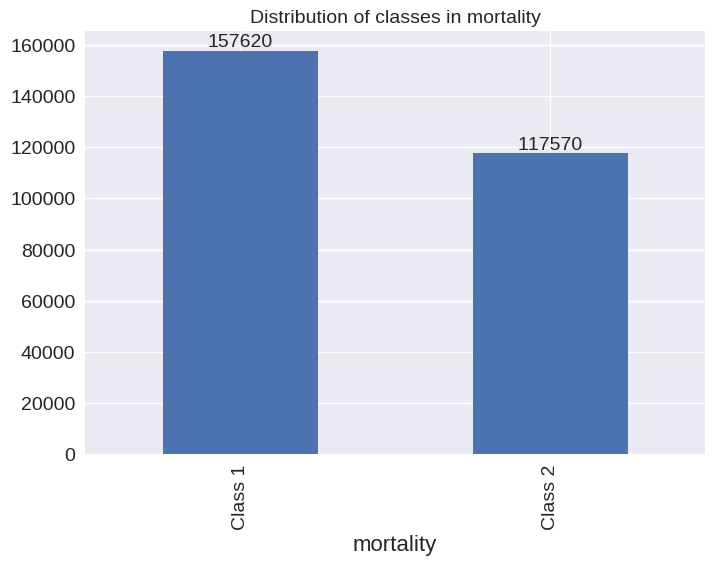

In [8]:
data_df['mortality'] = data_df['DEATH_5']+data_df['DEATH_10']
data_df['mortality']
target_dict = {
    2 : 'Class 1',
    1 :  'Class 1',
    0 : 'Class 2'
}
data_df['mortality'] = data_df['mortality'].map(target_dict)
data_df = data_df.drop(columns = ['DEATH_5','DEATH_10'])
count = data_df.groupby('mortality').size()
count.head()
ax = count.plot(kind = 'bar')
for i, v in enumerate(count):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.title("Distribution of classes in mortality")
plt.show()


# **EXPLORATORY DATA ANALYSIS**

## ABT REPORT

**Continous Variables Analysis**

In [9]:
def continuous_features_report(data_df):
    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

In [10]:
# build continuous features report
con_report_df = continuous_features_report(data_df)

In [12]:
con_report_df

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
SYSTOLIC,275190,0.00,144,79.00,128.00,136.84,136.00,145.00,240.00,13.27
A1C,275190,0.00,5128,1.20,6.30,7.08,6.85,7.60,19.73,1.17
AGE,275190,0.00,36,65.00,71.00,75.21,75.00,79.00,101.00,5.58
BMI,275190,0.00,514,10.50,26.50,30.00,29.40,32.80,92.30,5.09
HDL,275190,2.81,8099,10.00,33.60,40.86,39.33,46.50,90.00,10.45
LDL,275190,6.26,13435,20.00,75.75,92.56,90.67,107.00,220.00,25.11
DIASTOLIC,275190,0.00,84,36.00,65.00,70.38,70.00,75.00,144.00,7.71
TRI,275190,2.65,11685,10.50,100.67,164.00,141.67,200.25,2000.00,96.35
SERUMCRE,275190,4.27,7263,0.10,1.00,1.26,1.15,1.39,14.57,0.51
MICROALB,275190,74.15,12192,0.00,7.50,65.06,16.60,44.60,4957.16,205.64


In [13]:
def plot_box_plots_subplots(data_df, columns):
    """Plot box plots for multiple columns in a DataFrame with subplots.

    Args:
        data_df (pd.DataFrame): DataFrame containing the data.
        columns (list): List of column names to plot.
    """
    num_plots = len(columns) - 1
    ncols = 3  # Number of columns for subplots
    nrows = math.ceil(num_plots / ncols)
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
    plt.subplots_adjust(hspace=0.5)  # Adjust space between subplots

    # Flatten the axes array for easier iteration
    axs = axs.flatten()

    for i, column in enumerate(columns):
        if column == 'mortality':
          break
        else:
          ax = axs[i]
          sns.boxplot(x='mortality', y=column, data=data_df, ax=ax)
          ax.set_xlabel('')
          ax.set_ylabel('')
          ax.set_title(f'{column}')

    # Hide any remaining empty subplots
    for j in range(num_plots, nrows * ncols):
        fig.delaxes(axs[j])

    plt.show()



In [14]:
numerical_df = data_df.select_dtypes(exclude = 'category' and 'object')
selected_columns = ['SYSTOLIC', 'A1C', 'AGE','BMI','HDL','LDL', 'DIASTOLIC','TRI','N_IP','SERUMCRE','SERUMALB','N_OP','FRAILTY','mortality']
actual_numerical_df = data_df[selected_columns].copy()

**Box plots for the continous variables**

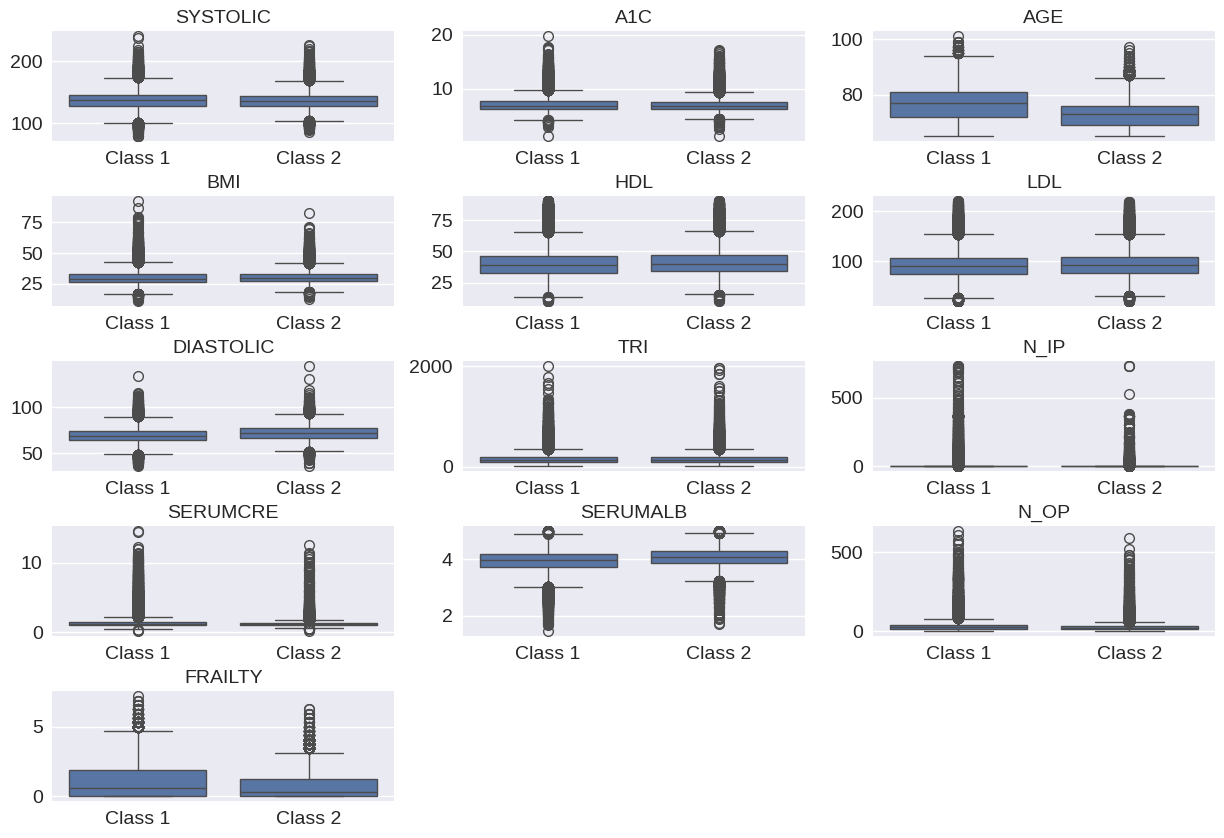

In [15]:
plot_box_plots_subplots(actual_numerical_df, selected_columns)


#### **SYSTOLIC** - there are some outliers. Less variation in Class 1 and Class 2 mortality
#### **A1C**- Too many outliers and very less variability in Class 1 and Class 2 mortality
#### **AGE** - Has very few outliers with Good variation in Class 1 and Class 2 mortality
#### **BMI** - Too many outliers but has good variability in Class 1 and Class 2 mortality
#### **HDL** - has too many outliers and has very less variability in Class 1 and Class 2 mortality
#### **LDL** - Very few outliers with Good variation in Class 1 and Class 2 mortality
#### **DIASTOLIC** - Has many outliers and moderate variability in Class 1 and Class 2 mortality
#### **TRI** - Too many outliers
#### **N_IP** - Too many outliers
#### **SERUMALB** - Has too many outliers but has good variability in Class 1 and Class 2 mortality
#### **SERUMCRE** - Has too many outliers but has a very good variability in Class 1 and Cass 2 mortality
#### **N_OP**- Has too many outliers and less variability in Class 1 and Class 2 mortality
#### **FRAILTY** - Has few outliers with Good variability in Class 1 and Class 2 mortality

**Based on the cardinality we can see that many variables have only 2 unique values. Hence creating bar plot for those variables and creating box plots for the remaining continuous variables.**

**Bar plots for variables with cardinality value 2**

In [16]:
binary_variables = data_df.columns[data_df.nunique() == 2]
binary_df = data_df[binary_variables]

In [17]:
binary_df.head()

,INSULIN,SULF,OTHER_MED,BIGUAN,TZD,ALPHA,SEX,CHF,ARRHYTHMIA,VALVULAR,PHTN,PVD,HTN,HTNCX,PARALYSIS,NEUROOTHER,PULMONARY,DMCX,HYPOTHYROID,RENAL,LIVER,PUD,HIV,LYMPHOMA,METS,TUMOR,RHEUMATIC,COAG,OBESITY,WEIGHTLOSS,FLUIDSLYTES,BLOODLOSS,ANEMIA,ALCOHOL,DRUGS,PSYCHOSES,DEPRESSION,SEVERE_DEP,CAD,AMI,RETINOPATHY,HYPERG,ABI,RETSCREEN,CABG,PCI,SMOKER,ESLD,FEET,AMPUTATION,BP_RX,mortality
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Class 1
1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,Class 1
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class 1
3,1,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,Class 1
4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Class 2


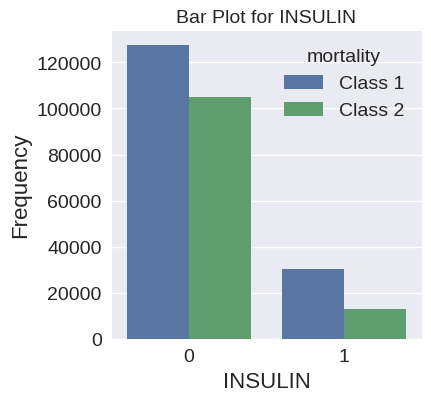

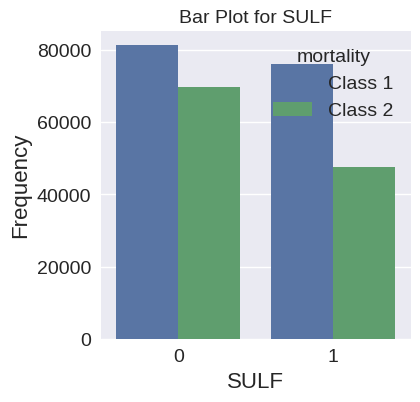

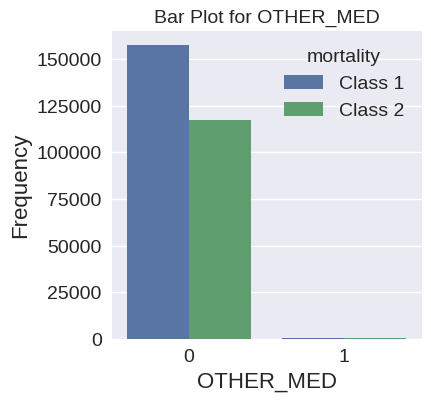

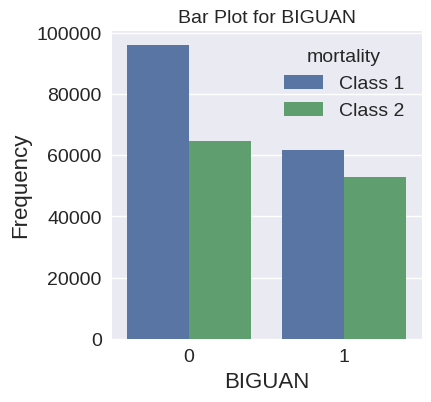

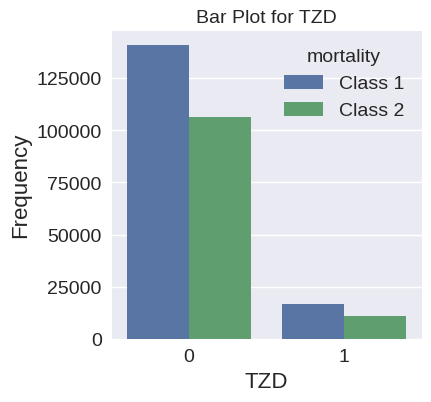

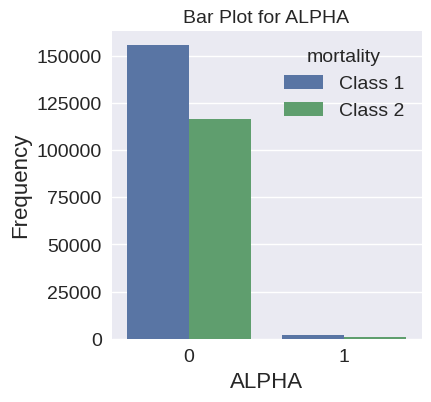

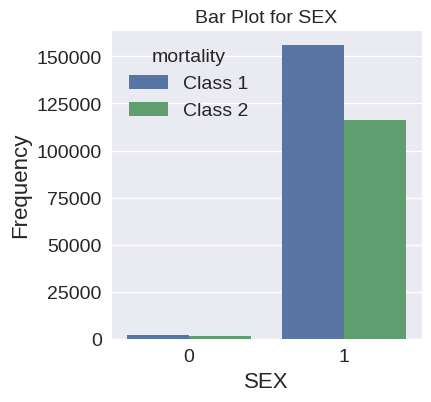

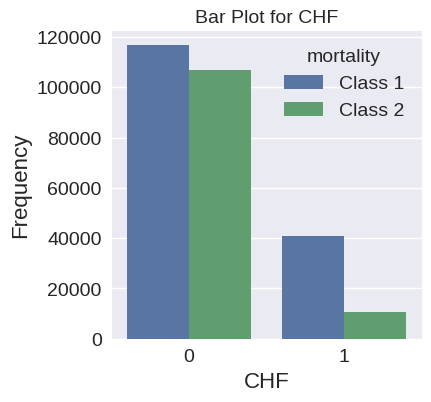

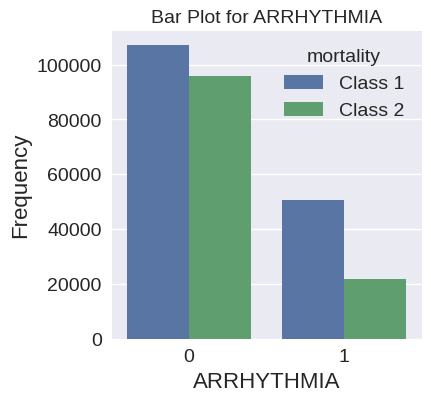

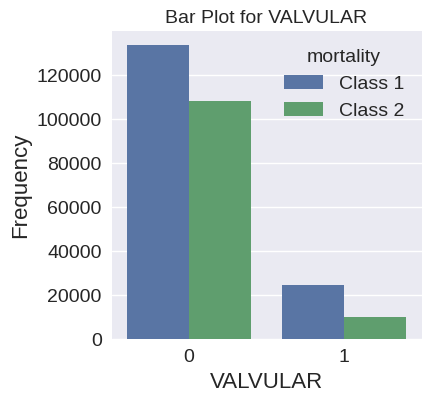

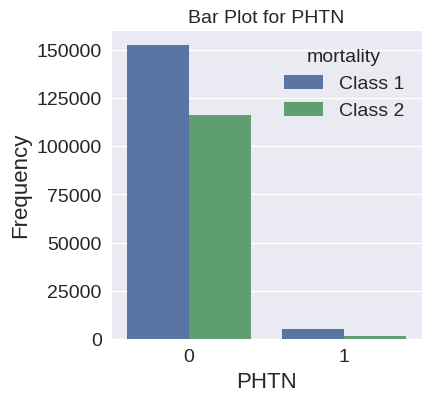

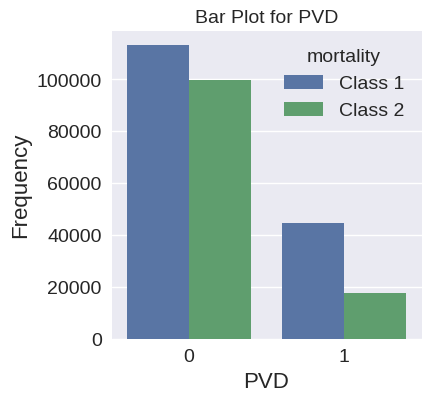

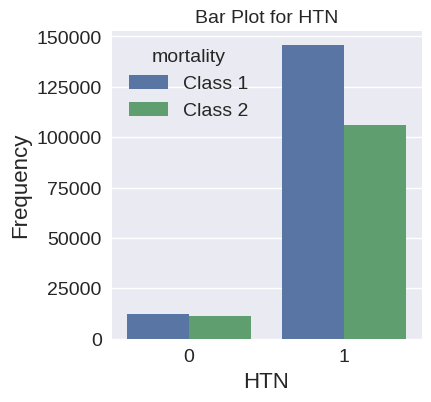

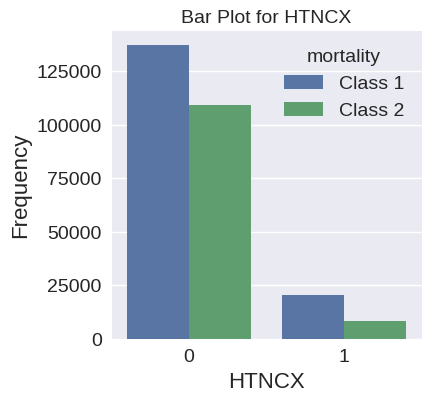

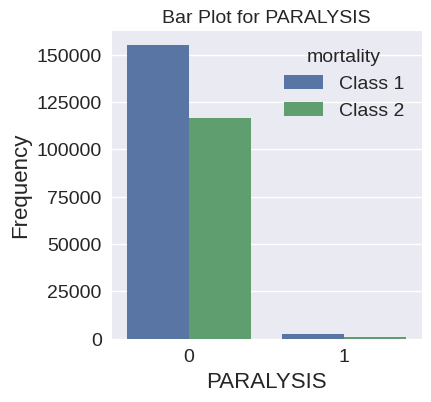

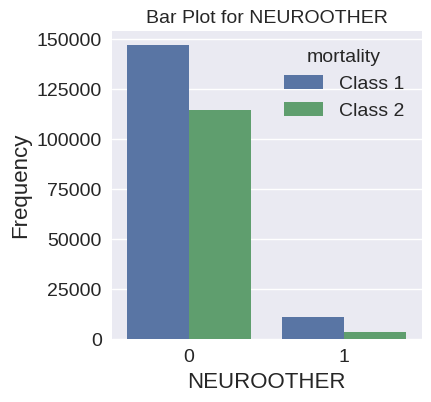

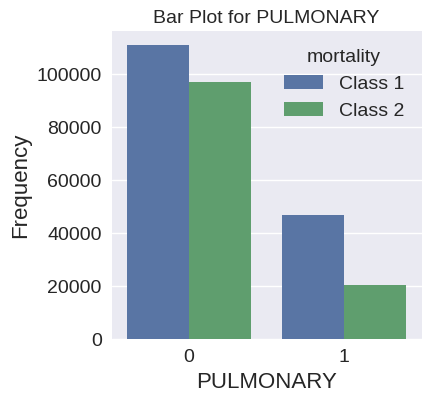

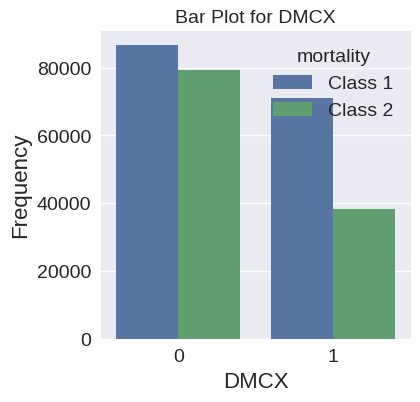

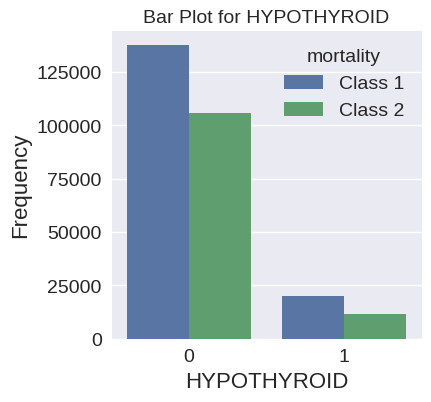

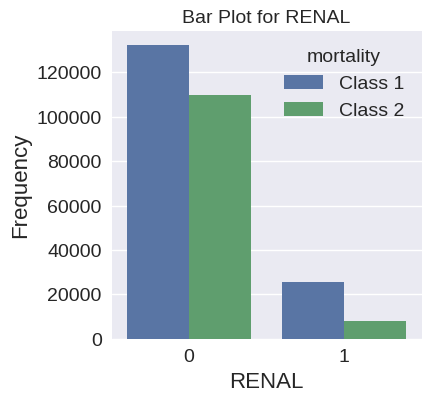

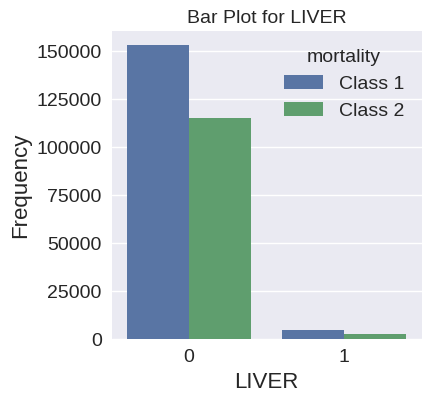

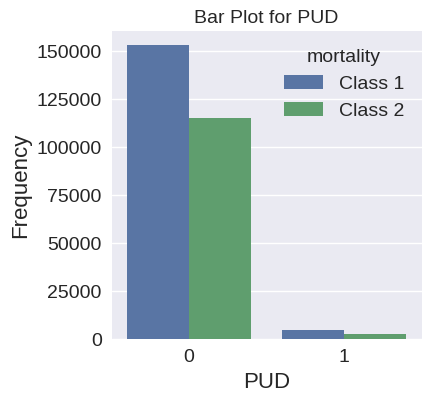

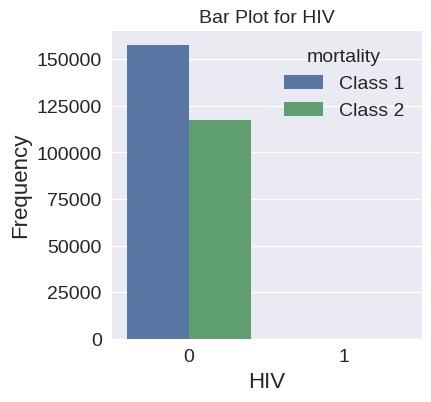

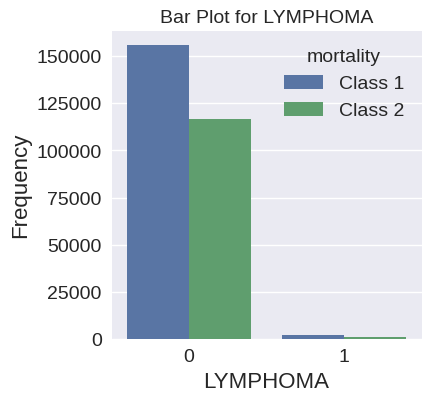

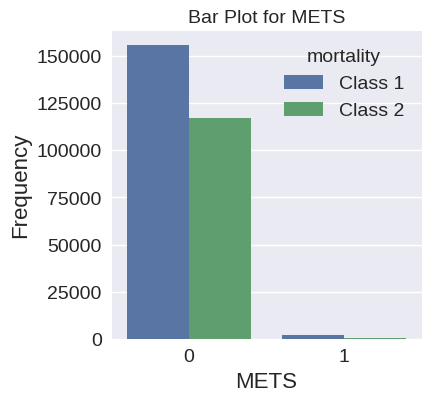

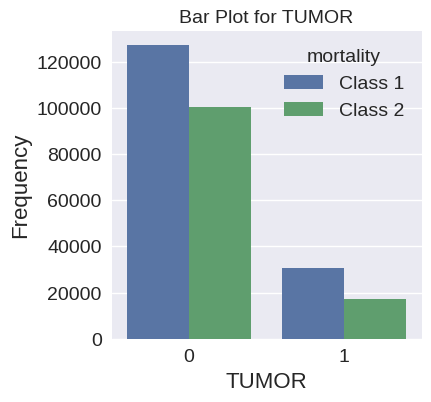

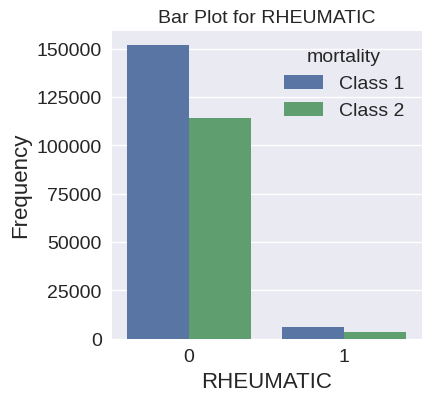

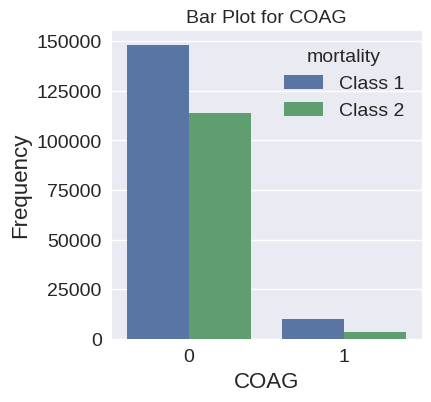

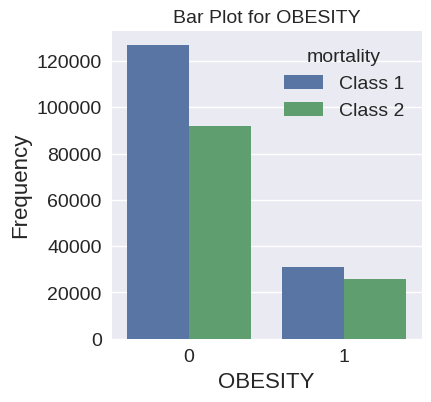

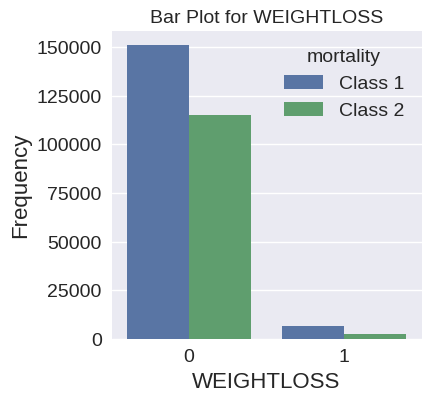

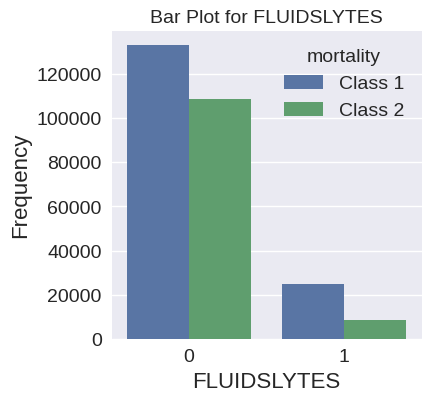

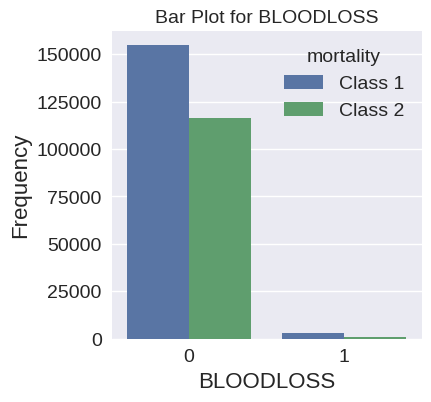

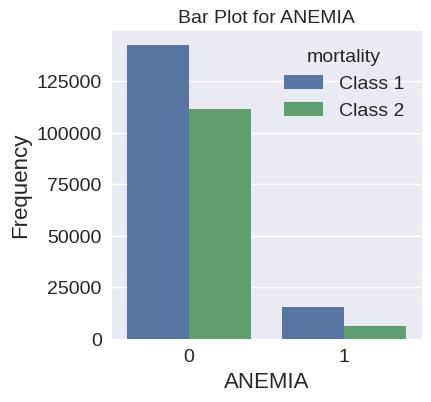

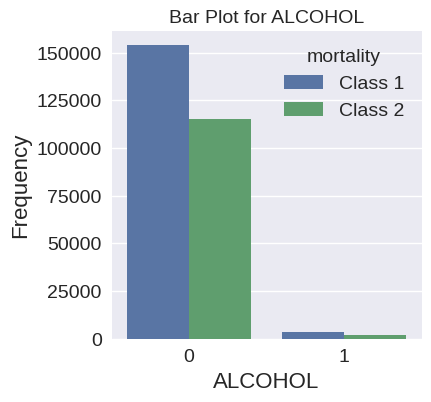

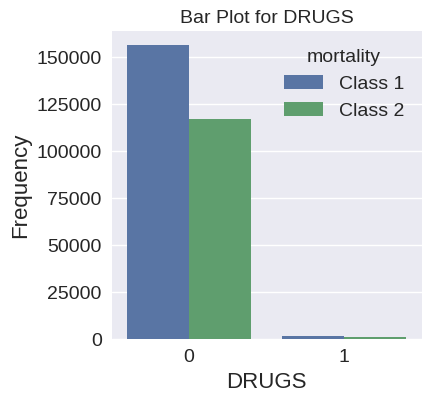

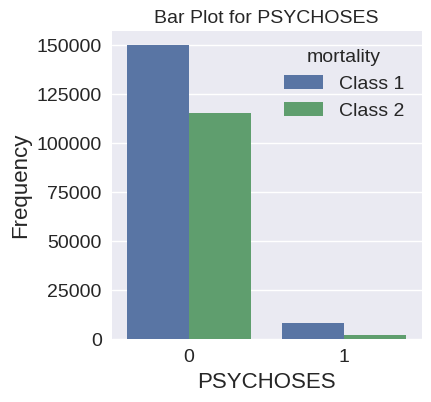

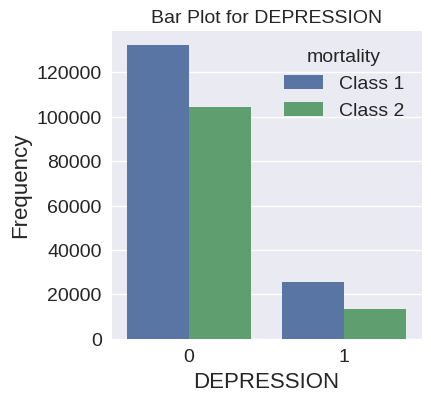

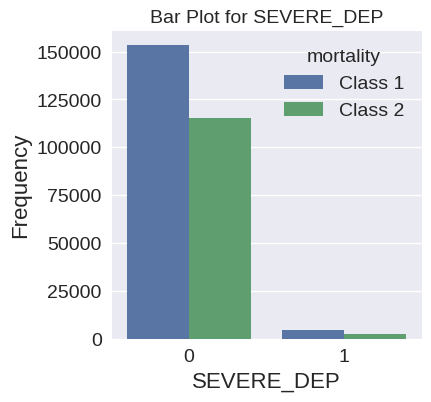

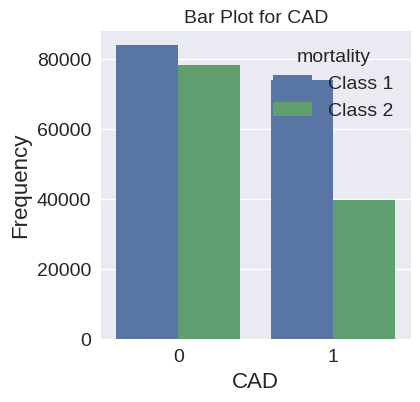

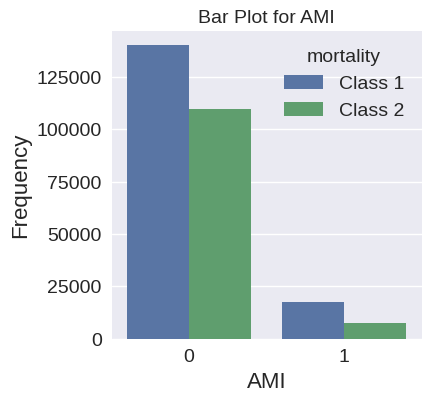

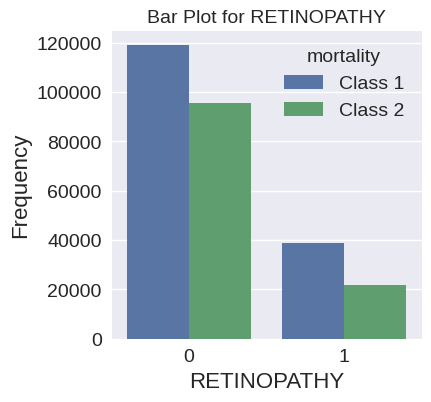

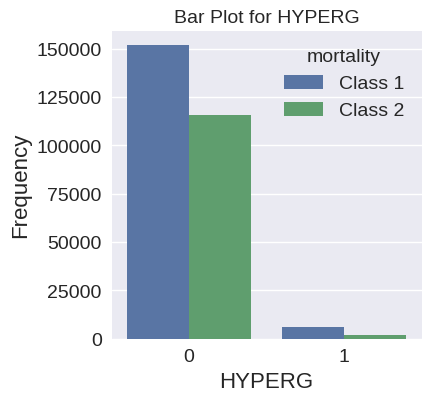

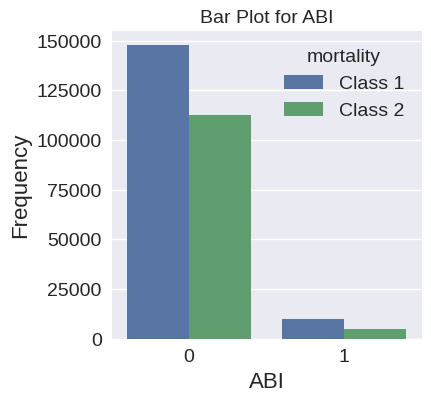

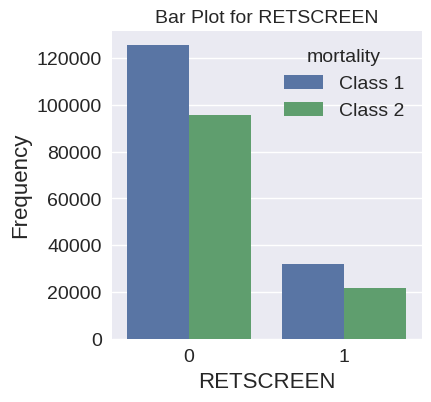

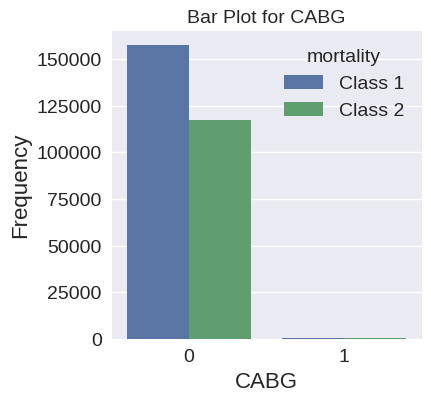

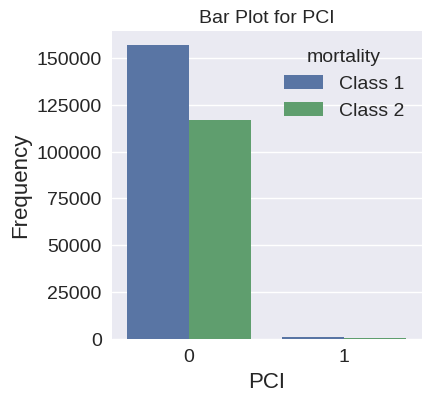

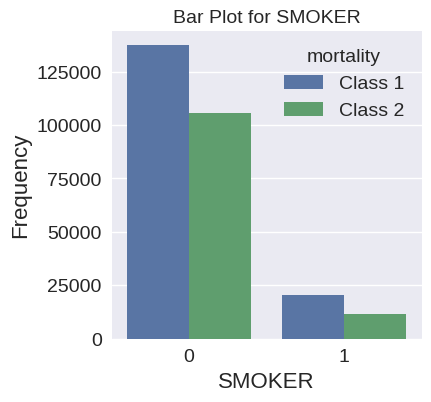

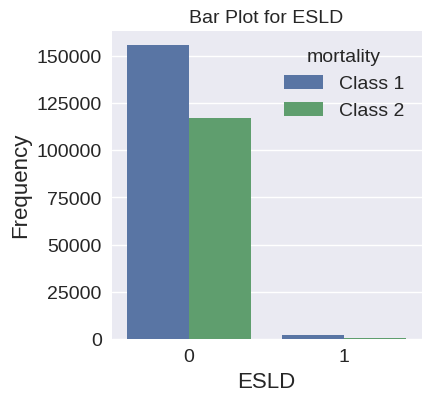

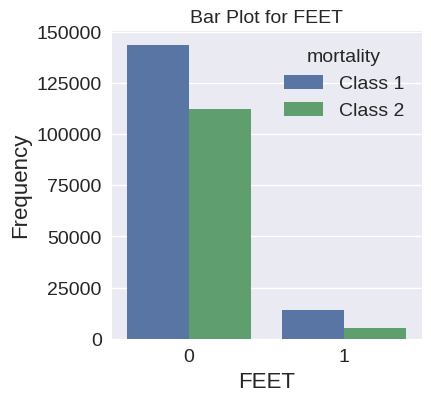

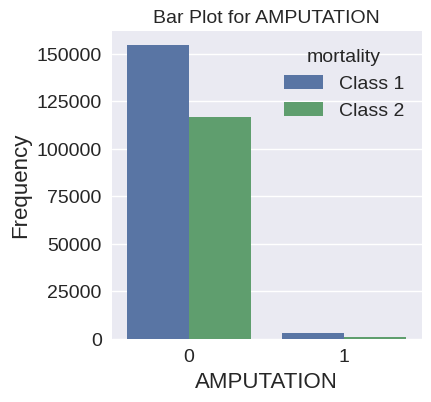

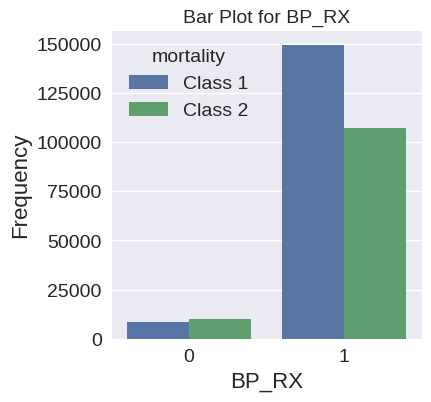

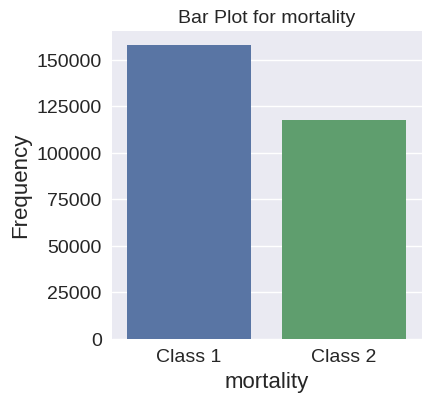

In [18]:
binary_variables = data_df.columns[data_df.nunique() == 2]
binary_df = data_df[binary_variables]


for column in binary_df.columns:
    value_counts = binary_df[column].value_counts()
    # print(value_counts)
    # Create figure and axis for the bar plot
    plt.figure(figsize=(4, 4))
    sns.countplot(x=column, hue='mortality', data=data_df)

    # # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Bar Plot for {column}')


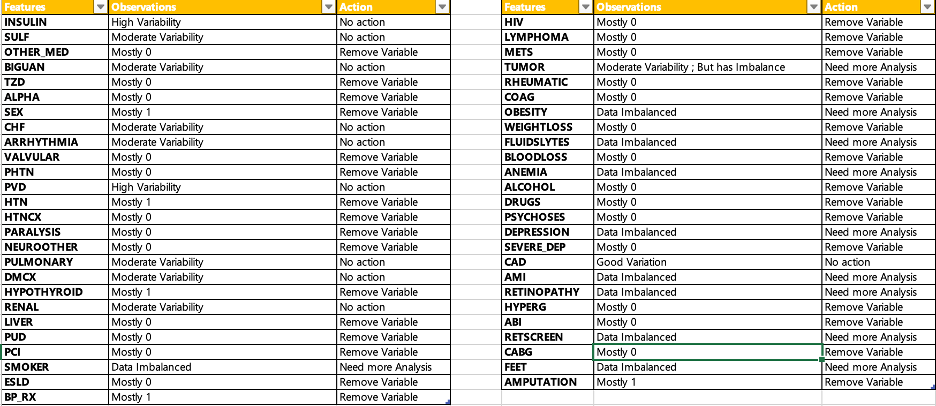

In [36]:
from IPython.display import Image, display

image_path = 'DATA DESCRIPTION BINARY VAR.png'

image = Image(filename=image_path)

# Display the image using the display() function
display(image)

**Categorical Variables Analysis**

Converting string columns datatype to category

In [19]:
string_columns = data_df.select_dtypes(include=['string']).columns

# Convert selected string columns to 'category' data type
data_df[string_columns] = data_df[string_columns].astype('category')

In [21]:
def build_categorical_features_report(data_df):

    """Build tabular report for categorical features"""

    def _mode(df):
        return df.apply(lambda ft: ",".join(ft.mode().to_list()))

    def _mode_freq(df):
        return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

    def _second_mode(df):
        return df.apply(lambda ft: ",".join(ft[~ft.isin(ft.mode())].mode().to_list()))

    def _second_mode_freq(df):
        return df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }

    cat_feat_names = data_df.select_dtypes(exclude="number").columns
    cat_data_df = data_df[cat_feat_names]

    report_df = pd.DataFrame(index=cat_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(cat_data_df)

    return report_df


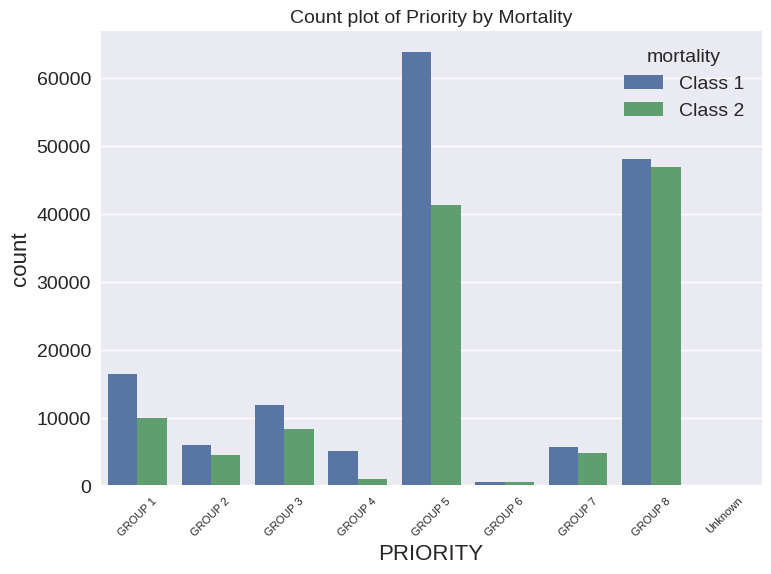

In [27]:
#fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.countplot(x='PRIORITY', hue='mortality', data=data_df)
ax.set_title(f'Count Plot of PRIORITY by Mortality')
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Decrease font size of x-axis labels
plt.tick_params(axis='x', labelsize=8)
plt.title('Count plot of Priority by Mortality')
plt.show()

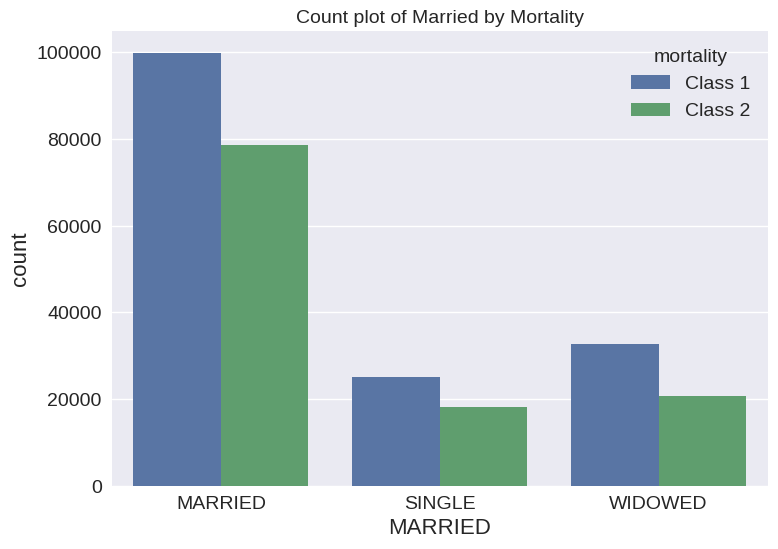

In [28]:
sns.countplot(x='MARRIED', hue='mortality', data=data_df)
ax.set_title(f'Count Plot of PRIORITY by Mortality')
plt.tight_layout()
plt.title('Count plot of Married by Mortality')
plt.show()

**Changing datatype of "RACE" variable from numeric to category**

In [25]:
race_mapping = {
    1: 'White',
    2: 'Black',
    3: 'Other'
}

data_df['RACE'] = data_df['RACE'].map(race_mapping)
data_df['RACE'] = data_df['RACE'].astype('category')

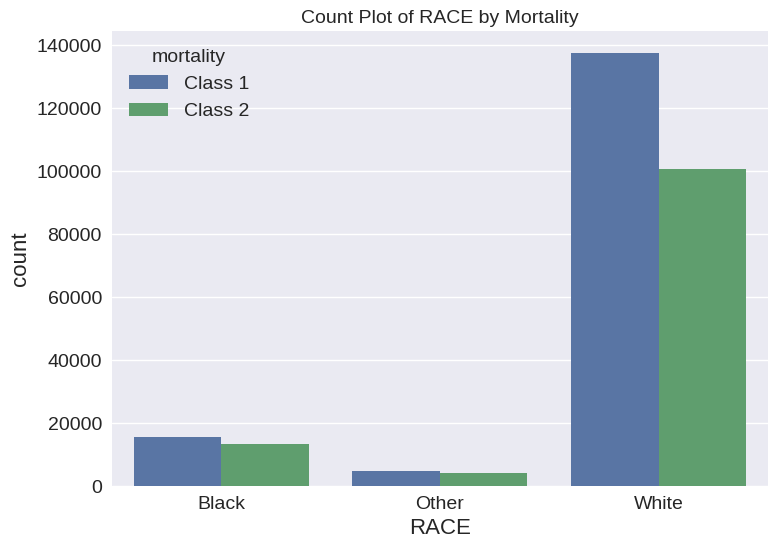

In [26]:
sns.countplot(x='RACE', hue='mortality', data=data_df)
ax.set_title(f'Count Plot of RACE by Mortality')
plt.tight_layout()
plt.title('Count Plot of RACE by Mortality')
plt.show()

In [32]:
categorical_df = data_df.select_dtypes(include = 'category')
categorical_df.columns

Index(['PRIORITY', 'MARRIED', 'RACE'], dtype='object')

In [33]:
build_categorical_features_report(categorical_df)

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
PRIORITY,275190,0.00,9,GROUP 5,105228,38.24,GROUP 8,95068,34.55
MARRIED,275190,0.00,3,MARRIED,178645,64.92,WIDOWED,53290,19.36
RACE,275190,0.00,3,White,238067,86.51,Black,28442,10.34


1. The dataset has too many instances for 'Priority 5' and 'Priority 8' compared to other classes of variable 'PRIORITY' showing a clear imbalance of data for the variable. 'UNKNOWN' category has minimal number of instances

2. The dataset has too many instances for 'MARRIED' compared to other classes('SINGLE & WIDOWED') of variable 'MARRIED' showing a clear imbalance of data for the variable

3. 2. The dataset has too many instances for 'WHITE' compared to other classes of variable 'RACE' showing a clear imbalance of data for the variable

**Duplicates**

In [34]:
duplicates = data_df[data_df.duplicated()]
print(duplicates)

        SYSTOLIC  A1C PRIORITY  AGE   BMI  MARRIED   HDL    LDL  DIASTOLIC  \
50           100 6.25  GROUP 3   79 22.20  WIDOWED 36.00  73.00         59   
128          100 7.53  GROUP 1   72 38.40  MARRIED 32.20  55.40         64   
175          101 5.20  GROUP 7   78 31.00  MARRIED 34.33  49.00         52   
281          101 7.10  GROUP 8   82 23.90  MARRIED  <NA>   <NA>         59   
491          102 7.10  GROUP 5   81 24.40   SINGLE 35.00  53.00         60   
...          ...  ...      ...  ...   ...      ...   ...    ...        ...   
274665       199 7.23  GROUP 1   71 32.50   SINGLE 47.50 109.25         96   
274688       201 7.83  GROUP 8   70 37.00  MARRIED 58.50  81.75         88   
274736       211 6.00  GROUP 8   82 38.90  WIDOWED 53.00  83.00         88   
275047        98 6.50  GROUP 1   83 25.50  MARRIED 33.50   <NA>         42   
275074        98 7.40  GROUP 5   75 26.40  MARRIED 53.33  82.33         58   

          TRI  SERUMCRE  MICROALB  SERUMALB  N_IP  N_OP  INSULI

# **DATA QUALITY PLAN**

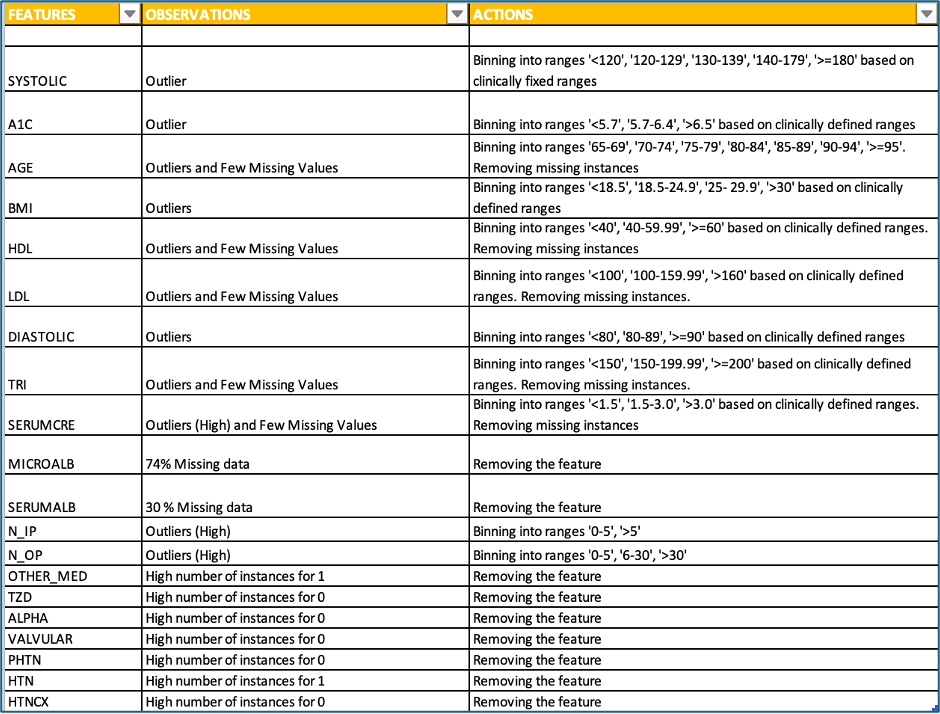

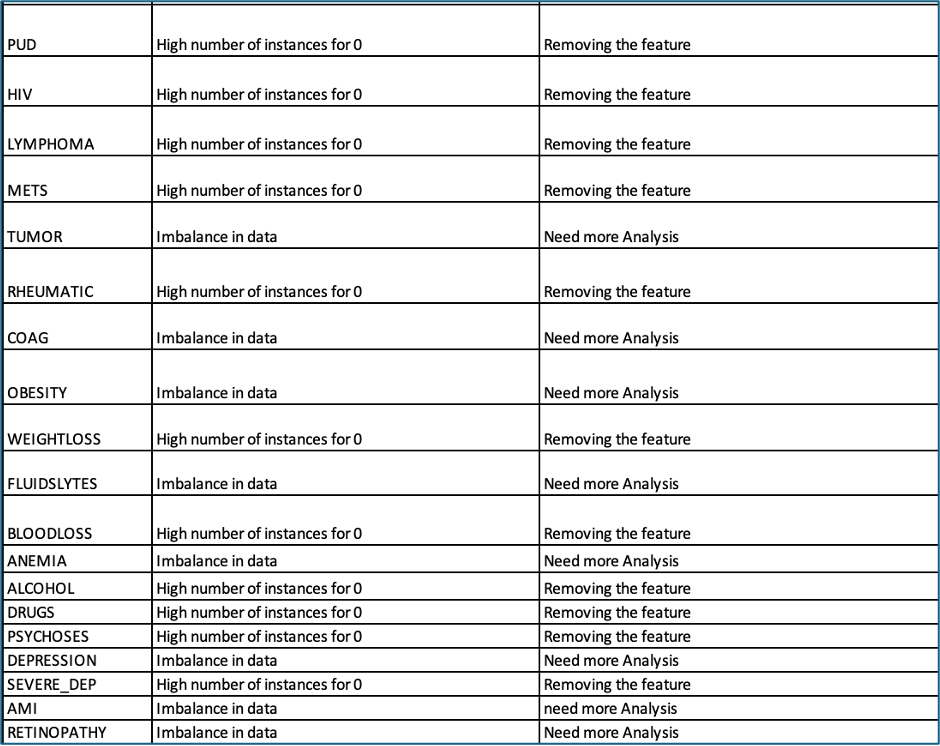

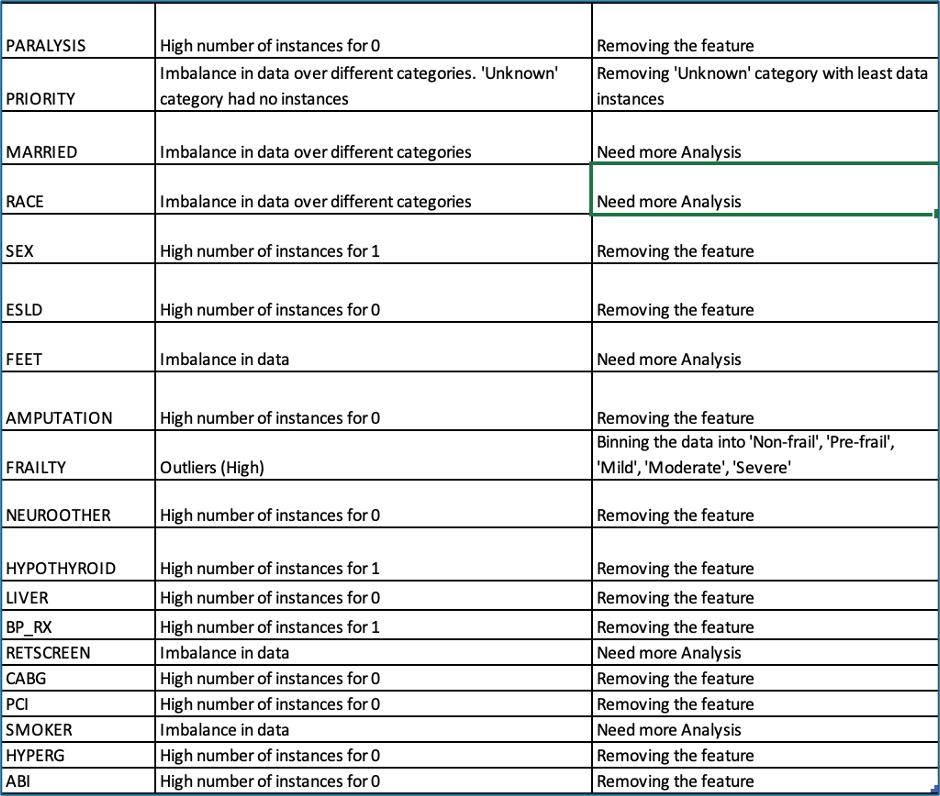

In [38]:
from IPython.display import Image, display

image_path = 'ABT_1.png'

image1 = Image(filename=image_path)
image_path = 'ABT_2.png'

image2 = Image(filename=image_path)
image_path = 'ABT_3.png'

image3 = Image(filename=image_path)
# Display the image using the display() function
display(image1)
display(image2)
display(image3)

There are a few columns where we have mentioned that it should be removed. But we didn't removeit explicitly here. We have considered Information Value and Weight of Evidence for taking the decision of removal

# **Data Preparation**

**Missing Values Treatment**

It is identified from ABT report that columns ‘MICROALB’, ‘SERUMALB’ have a high proportion of missing values - 74.15% and 30.47% respectively. The variables ‘AGE’, ‘HDL’, ‘LDL’, ‘SERUMCRE’, ‘TRI’ also had a few missing values. We will remove this null values in these columns signify that these tests didn't perform for some individual

In [42]:
data_df = data_df.drop(columns = ['SERUMALB','MICROALB'])
data_df.dropna(subset=['SERUMCRE'], inplace=True)
data_df.dropna(subset=['HDL'], inplace=True)
data_df.dropna(subset=['LDL'], inplace=True)
data_df.dropna(subset=['TRI'], inplace=True)
data_df.dropna(subset=['AGE'], inplace=True)

**Removing Duplicates**

Duplicates are handled using drop_duplicates function. Initially, shape of our dataset is (270188, 70). After handling missing values and duplicates, the shape of our dataset is (263634, 67).

In [40]:
data_df = data_df.drop_duplicates(keep='last')
data_df.shape

(243271, 67)

## Handling Outliers - Binning

As we have identified outliers in a few columns, there is no evidence that they are actual outliers. So, based on the data quality report we are converting some continous columns in categories by using binning technique. We have decided the binning ranges based on clinical biomarkers.

The box plots of numerical variables clearly indicate the presence of Outliers in few predictor variables. These columns include “AGE”, “BMI”, “A1C”, “SERUMALB”, “SERUMCRE”, “N_IP”, “N_OP”, “SYSTOLIC”, “DIASTOLIC”, “TRI”, “LDL”, “HDL”, “FRAILTY”.

In [43]:
data_df['AGE'] = pd.cut(x=data_df['AGE'], bins=[65, 70, 75, 80, 85, 90, 95, 100],
                     right = False, labels=['65-69', '70-74', '75-79',
                            '80-84', '85-89', '90-94', '>=95'],include_lowest = True)

In [44]:
data_df['BMI'] = pd.cut(x=data_df['BMI'], bins=[10, 18.4, 24.9, 29.9, np.inf],
                     right = False, labels=['<18.5', '18.5-24.9', '25- 29.9', '>30'],include_lowest = True)

In [45]:
data_df['A1C'] = pd.cut(x=data_df['A1C'], bins=[-np.inf, 5.7,6.4, np.inf],
                     right = False, labels=['<5.7', '5.7-6.4', '>6.5'],include_lowest = True)

In [46]:
data_df['SERUMCRE'] = pd.cut(x=data_df['SERUMCRE'], bins=[-np.inf, 1.49, 3.00, np.inf],
                     right = False, labels=['<1.5', '1.5-3.0', '>3.0'],include_lowest = True)

In [47]:
data_df['N_IP'] = pd.cut(x=data_df['N_IP'], bins=[0, 5, np.inf],
                     right = False, labels=['0-5', '>5'],include_lowest = True)
data_df['N_OP'] = pd.cut(x=data_df['N_OP'], bins=[0, 5, 30, np.inf],
                     right = False, labels=['0-5', '6-30', '>30'],include_lowest = True)


In [48]:
data_df['SYSTOLIC'] = pd.cut(x=data_df['SYSTOLIC'], bins=[-np.inf, 119, 129, np.inf],
                     right = False, labels=['<120', '120-129', '>130'],include_lowest = True)


In [49]:
data_df['DIASTOLIC'] = pd.cut(x=data_df['DIASTOLIC'], bins=[-np.inf, 79, 89, np.inf],
                     right = False, labels=['<80', '80-89', '>=90'],include_lowest = True)


In [50]:
data_df['TRI'] = pd.cut(x=data_df['TRI'], bins=[-np.inf, 149.99, 199.99, np.inf],
                     right = False, labels=['<150', '150-199.99', '>=200'],include_lowest = True)


In [51]:
data_df['LDL'] = pd.cut(x=data_df['LDL'], bins=[-np.inf, 99.99,159.99, np.inf],
                     right = False, labels=['<100', '100-159.99', '>160'],include_lowest = True)


In [52]:
data_df['HDL'] = pd.cut(x=data_df['HDL'], bins=[-np.inf, 39.99, 59.99, np.inf],
                     right = False, labels=['<40', '40-59.99', '>=60'],include_lowest = True)


In [53]:
data_df['FRAILTY'] = pd.cut(x=data_df['FRAILTY'], bins=[0.00, 0.10, 0.20, 0.30, 0.40, np.inf],
                     right = False, labels=['Non-frail', 'Pre-frail', 'Mild', 'Moderate', 'Severe'],include_lowest = True)


**Changing data type of "Sex" variable**

In [54]:
data_df['SEX'] = data_df['SEX'].astype('category')
data_df.describe(exclude=['number'])

,SYSTOLIC,A1C,PRIORITY,AGE,BMI,MARRIED,HDL,LDL,DIASTOLIC,TRI,SERUMCRE,N_IP,N_OP,SEX,RACE,FRAILTY,mortality
count,243271,243271,243271,243270,243271,243271,243271,243271,243271,243271,243271,243271,243271,243271,243271,243271,243271
unique,3,3,9,7,4,3,3,3,3,3,3,2,3,2,3,3,2
top,>130,>6.5,GROUP 5,70-74,>30,MARRIED,<40,<100,<80,<150,<1.5,0-5,6-30,1,White,Severe,Class 1
freq,179927,173269,93187,75940,112101,157702,126181,159118,208800,132924,198855,225854,151518,240476,211025,126631,139259


**Plotting variables which are converted from numeric to categories**

In [55]:
selected_columns = ['SYSTOLIC','A1C', 'AGE','BMI','HDL','LDL', 'DIASTOLIC','TRI','SERUMCRE','N_OP','N_IP','FRAILTY','mortality']
more_categorical_df = data_df[selected_columns]

cat_report_df = build_categorical_features_report(more_categorical_df)
print(cat_report_df)

            Count  Miss %  Card.     Mode  Mode Freq  Mode %    2nd Mode  \
SYSTOLIC   243271    0.00      3     >130     179927   73.96     120-129   
A1C        243271    0.00      3     >6.5     173269   71.22     5.7-6.4   
AGE        243271    0.00      7    70-74      75940   31.22       75-79   
BMI        243271    0.00      4      >30     112101   46.08    25- 29.9   
HDL        243271    0.00      3      <40     126181   51.87    40-59.99   
LDL        243271    0.00      3     <100     159118   65.41  100-159.99   
DIASTOLIC  243271    0.00      3      <80     208800   85.83       80-89   
TRI        243271    0.00      3     <150     132924   54.64       >=200   
SERUMCRE   243271    0.00      3     <1.5     198855   81.74     1.5-3.0   
N_OP       243271    0.00      3     6-30     151518   62.28         >30   
N_IP       243271    0.00      2      0-5     225854   92.84          >5   
FRAILTY    243271    0.00      3   Severe     126631   52.05   Non-frail   
mortality  2

In [56]:
def plot_bar_plots_subplots(data_df):
    """Plot bar plots for multiple columns in a DataFrame with subplots.

    Args:
        data_df (pd.DataFrame): DataFrame containing the data.
        columns (list): List of column names to plot.
    """
    categorical_df = data_df.select_dtypes("category").columns
    num_plots = len(categorical_df) - 1
    ncols = 3  # Number of columns for subplots
    nrows = math.ceil(num_plots / ncols)
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
    plt.subplots_adjust(hspace=0.5)  # Adjust space between subplots

    # Flatten the axes array for easier iteration
    axs = axs.flatten()

    for i, column in enumerate(categorical_df):
        if column == 'mortality':
            continue
        else:
            ax = axs[i]
            sns.barplot(x='mortality', y=column, data=data_df, ax=ax)
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(f'{column}')

    # Hide any remaining empty subplots
    for j in range(num_plots, nrows * ncols):
        fig.delaxes(axs[j])

    plt.show()


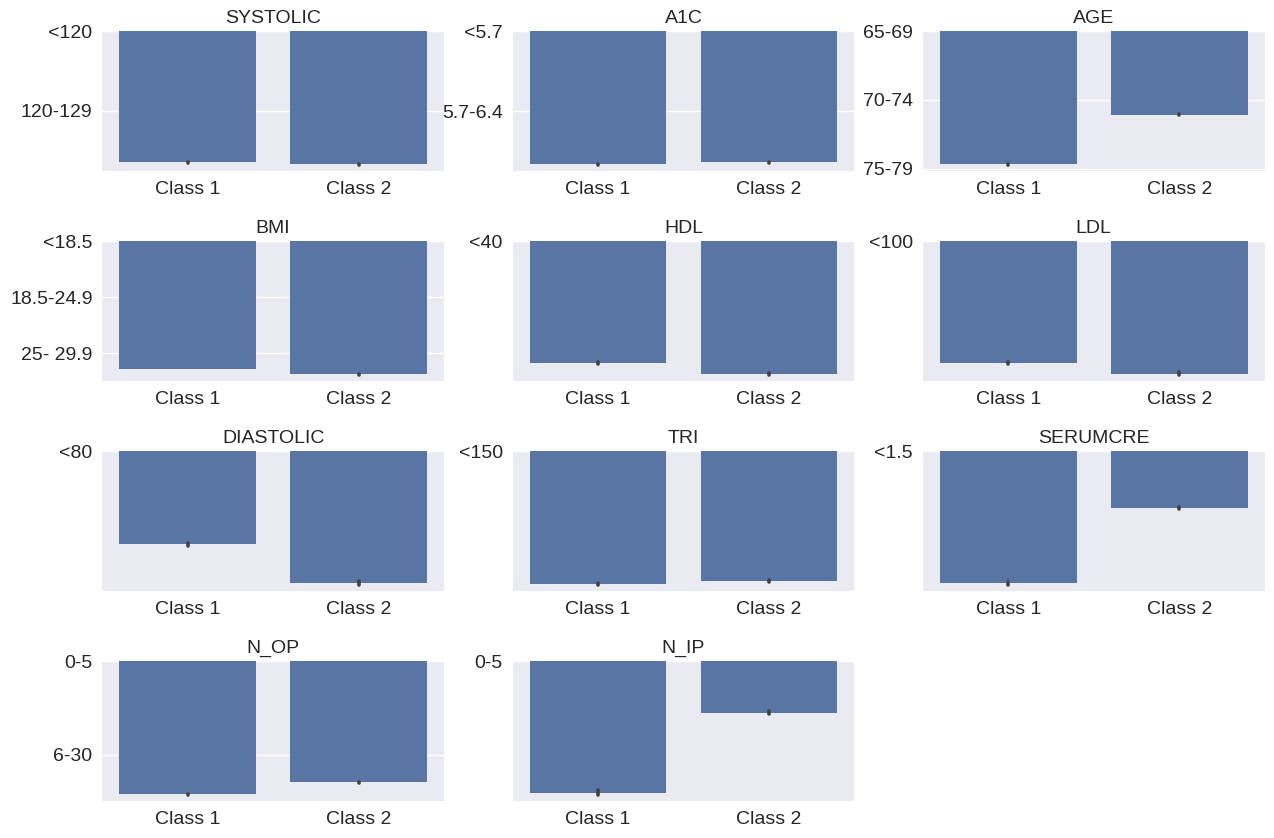

In [57]:
plot_bar_plots_subplots(more_categorical_df)

## **Feature Engineering**

### Check Feature Importance

After implementing binning, all predictor variables are categorical. Since our target variable (mortality) is also a categorical variable, we have used the chi-square test which gives the value of chi-square statistic. This will help in determining the strength of the relationship between the predictor variables and the target variable.



In [59]:
def perform_chi_square_test(data_df):
    results = []

    # Iterate over predictors in the DataFrame
    for column in data_df.columns:
        if pd.api.types.is_categorical_dtype(data_df[column]):
            # Create a contingency table
            contingency_table = pd.crosstab(data_df[column], data_df['mortality'])
            # Perform chi-square test
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            # Append results to the list
            results.append({'Column': column, 'Chi-Square': chi2, 'p-value': p, 'Degrees of Freedom': dof})

    # Create DataFrame from the results
    results_df = pd.DataFrame(results)

    return results_df


In [60]:
chi_square_results_df = perform_chi_square_test(data_df)
sorted_results_df = chi_square_results_df.sort_values(by='p-value', ascending=False)
print("\nSorted by p-value:")
print(sorted_results_df)


Sorted by p-value:
       Column  Chi-Square  p-value  Degrees of Freedom
13        SEX        5.96     0.01                   1
9         TRI       34.13     0.00                   2
14       RACE      175.83     0.00                   2
0    SYSTOLIC      221.30     0.00                   2
7         LDL      231.07     0.00                   2
1         A1C      269.07     0.00                   2
5     MARRIED      411.45     0.00                   2
6         HDL      509.52     0.00                   2
8   DIASTOLIC     1267.38     0.00                   2
2    PRIORITY     3796.12     0.00                   8
3         AGE    23380.27     0.00                   6
4         BMI     1536.45     0.00                   3
10   SERUMCRE     7234.05     0.00                   2
11       N_IP     3095.71     0.00                   1
12       N_OP     4165.81     0.00                   2
15    FRAILTY     1503.18     0.00                   2


We have used hypothesis approach to identify predictor variables which have impact significant impact on the target variable.

**H0 (Null Hypothesis)** - There is no significant relationship between the predictor variables and target variable.

**H1 (Alternate Hypothesis)** - There is a significant relationship between the predictor variables and target variable.

**Signification level** - 0.05

**Inference:**

Based on above output, we can infer that "Sex" column's p value is greater than the significance level. This shows we are failed to reject the null hypothesis for "Sex" column. We can remove it from our dataframe "data_df".

Rest of the columns can be considered as their p value is less than the significance level.

In [61]:
data_df = data_df.drop(columns= ['SEX'])

The Cramer's V test was used to evaluate the correlation between the predictor variables as well as between predictors and the target variable. This test allowed us to gauge the strength of association between pairs of categorical predictors. In Cramer's V test, values range from 0 (indicating no association) to 1 (indicating a perfect association).

In [63]:
categorical_df = data_df.select_dtypes("category")

In [64]:
def cramers_v(x, y):
    """Function to compute Cramer's V statistic"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))



variables = categorical_df.columns
num_vars = len(variables)

cramer_vs = {}
cramer_matrix = pd.DataFrame(np.zeros((num_vars, num_vars)), columns=variables, index=variables)
for i, column in enumerate(categorical_df):
    for j, column1 in enumerate(categorical_df):
        cramer_v = cramers_v(data_df[column], data_df[column1])
        #cramer_vs[(column, column1)] = cramer_v
        cramer_matrix.iloc[i, j] = cramer_v
        cramer_matrix.iloc[j, i] = cramer_v


print("Matrix of Cramer's V results:")
#print(cramer_matrix)




Matrix of Cramer's V results:
           SYSTOLIC  A1C  PRIORITY  AGE  BMI  MARRIED  HDL  LDL  DIASTOLIC  \
SYSTOLIC       1.00 0.02      0.02 0.01 0.04     0.01 0.02 0.05       0.14   
A1C            0.02 1.00      0.03 0.03 0.03     0.01 0.03 0.02       0.01   
PRIORITY       0.02 0.03      1.00 0.06 0.03     0.17 0.02 0.03       0.02   
AGE            0.01 0.03      0.06 1.00 0.12     0.15 0.03 0.04       0.09   
BMI            0.04 0.03      0.03 0.12 1.00     0.02 0.11 0.01       0.04   
MARRIED        0.01 0.01      0.17 0.15 0.02     1.00 0.01 0.03       0.03   
HDL            0.02 0.03      0.02 0.03 0.11     0.01 1.00 0.05       0.01   
LDL            0.05 0.02      0.03 0.04 0.01     0.03 0.05 1.00       0.07   
DIASTOLIC      0.14 0.01      0.02 0.09 0.04     0.03 0.01 0.07       1.00   
TRI            0.02 0.06      0.02 0.07 0.12     0.01 0.21 0.03       0.02   
SERUMCRE       0.02 0.03      0.04 0.08 0.03     0.01 0.06 0.02       0.04   
N_IP           0.05 0.02      0.18

In [69]:
cramer_matrix

,SYSTOLIC,A1C,PRIORITY,AGE,BMI,MARRIED,HDL,LDL,DIASTOLIC,TRI,SERUMCRE,N_IP,N_OP,RACE,FRAILTY
SYSTOLIC,1.00,0.02,0.02,0.01,0.04,0.01,0.02,0.05,0.14,0.02,0.02,0.05,0.02,0.04,0.03
A1C,0.02,1.00,0.03,0.03,0.03,0.01,0.03,0.02,0.01,0.06,0.03,0.02,0.02,0.03,0.01
PRIORITY,0.02,0.03,1.00,0.06,0.03,0.17,0.02,0.03,0.02,0.02,0.04,0.18,0.21,0.12,0.13
AGE,0.01,0.03,0.06,1.00,0.12,0.15,0.03,0.04,0.09,0.07,0.08,0.03,0.02,0.04,0.10
BMI,0.04,0.03,0.03,0.12,1.00,0.02,0.11,0.01,0.04,0.12,0.03,0.04,0.03,0.04,0.01
MARRIED,0.01,0.01,0.17,0.15,0.02,1.00,0.01,0.03,0.03,0.01,0.01,0.08,0.07,0.09,0.10
HDL,0.02,0.03,0.02,0.03,0.11,0.01,1.00,0.05,0.01,0.21,0.06,0.03,0.03,0.09,0.01
LDL,0.05,0.02,0.03,0.04,0.01,0.03,0.05,1.00,0.07,0.03,0.02,0.02,0.02,0.06,0.05
DIASTOLIC,0.14,0.01,0.02,0.09,0.04,0.03,0.01,0.07,1.00,0.02,0.04,0.06,0.06,0.05,0.04
TRI,0.02,0.06,0.02,0.07,0.12,0.01,0.21,0.03,0.02,1.00,0.05,0.00,0.02,0.11,0.01


Following the application of Cramer's V test, we found no significant correlations among the predictor variables. Additionally, we observed no significant associations between the predictor variables and the mortality target variable.

Performing Label encoding on the target variable

In [65]:
label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(data_df['mortality'])

# Replace the original target column with the encoded values
data_df['mortality'] = encoded_target

We have used Phi coefficient to identify correlation between binary predictor variables and target variable.
The Phi coefficient measures the strength and direction of association between two binary variables. In our case, the target variable is mortality, and each predictor is a binary variable indicating the presence or absence of a specific condition or characteristic.

In [66]:
binary_variables = data_df.columns[data_df.nunique() == 2]
binary_df = data_df[binary_variables]
binary_df = binary_df.select_dtypes(include=['int64','int32'])


In [67]:
def phi_coefficient(a, b, c, d):
    numerator = (a * d) - (b * c)
    denominator = np.sqrt((a + b) * (c + d) * (a + c) * (b + d))
    phi = numerator / denominator
    return phi

def calculate_phi_coefficients(data_df, target_variable):
    phi_coeffs = {}
    for column in data_df.columns:
        if column != target_variable:
            contingency_table = pd.crosstab(data_df[column], data_df[target_variable])
            if contingency_table.shape == (2, 2):
                a = contingency_table.iloc[1, 1]
                b = contingency_table.iloc[1, 0]
                c = contingency_table.iloc[0, 1]
                d = contingency_table.iloc[0, 0]
                phi = phi_coefficient(a, b, c, d)
                phi_coeffs[column] = phi
    return phi_coeffs


phi_coeffs = calculate_phi_coefficients(binary_df, 'mortality')
print("Phi coefficients:")
for predictor, phi in phi_coeffs.items():
    print(f"{predictor}: {phi}")


Phi coefficients:
INSULIN: -0.7890064895525275
SULF: nan
OTHER_MED: -0.004391207878871904
BIGUAN: 0.35543972621502845
TZD: -0.11113925050526789
ALPHA: nan
CHF: -1.7685094410905036
ARRHYTHMIA: -4.059525452498272
VALVULAR: -0.7669873096491108
PHTN: -0.25140079258819575
PVD: -1.0447168212048488
HTN: nan
HTNCX: -0.3122113696512452
PARALYSIS: nan
NEUROOTHER: -0.25886128920113777
PULMONARY: nan
DMCX: -1.2483217870412708
HYPOTHYROID: nan
RENAL: nan
LIVER: -0.07214175623571355
PUD: -0.06060914157455442
HIV: -0.0012395426284444874
LYMPHOMA: -0.03114880400492898
METS: -0.04031790144025192
TUMOR: nan
RHEUMATIC: -0.04737493655194464
COAG: -0.2696644486161873
OBESITY: nan
WEIGHTLOSS: -0.11197590879583796
FLUIDSLYTES: nan
BLOODLOSS: nan
ANEMIA: -0.26064511238153215
ALCOHOL: nan
DRUGS: -0.014466880391143777
PSYCHOSES: nan
DEPRESSION: nan
SEVERE_DEP: -0.07918924969702033
CAD: -0.8532841844540198
AMI: nan
RETINOPATHY: nan
HYPERG: -0.12562554590120878
ABI: -0.12076793265781881
RETSCREEN: -0.111026602119

1. INSULIN: A relatively strong negative association with mortality, indicating that the absence of insulin treatment is associated with a higher likelihood of mortality.

2. SULF, ALPHA, HTN, PARALYSIS, PULMONARY, HYPOTHYROID, RENAL, TUMOR, OBESITY, FLUIDSLYTES, BLOODLOSS, LYMPHOMA, SMOKER, ALCOHOL, PSYCHOSES, DEPRESSION, AMI, RETINOPATHY, AMPUTATION, CAD, PCI: Phi coefficients are 'nan' (not a number), indicating that these variables might not have enough variation or may be redundant for the calculation. We didn’t remove these columns at this step. We did further analysis to find more evidence in removing these columns. (See Appendix Fig. 69)

3. OTHER_MED, BIGUAN, TZD, VALVULAR, PHTN, HTNCX, NEUROOTHER, DMCX, LIVER, PUD, HIV, METS, RHEUMATIC, COAG, WEIGHTLOSS, ANEMIA, DRUGS, SEVERE_DEP, RETSCREEN, ABI, CABG, ESLD, FEET, BP_RX: These predictors show varying degrees of association with mortality, but further analysis would be needed to determine their significance and practical relevance.


### Feature Selection based on Information Value and Weight of Evidence

When evaluating data, WOE and IV have different roles to play. WOE explains the link between a binary target variable and a predictive variable. IV gauges how strong that connection is. For the evaluation, we have encoded the target variable (mortality)

In [71]:
data_df_iv = data_df

In [72]:

label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(data_df['mortality'])

# Replace the original target column with the encoded values
data_df_iv['mortality'] = encoded_target

We have created below function to calculate information value

In [73]:
def calculate_information_value(data, predictor, target):

    data = data[[predictor, target]]
    data = data.dropna()
    n = data.shape[0]
    good = data[target].sum()
    bad = n - good
    unique_values = data[predictor].unique()
    iv = 0
    for value in unique_values:
        n1 = data[data[predictor] == value].shape[0]
        good1 = data[(data[predictor] == value) & (data[target] == 1)].shape[0]
        bad1 = n1 - good1
        if good1 == 0 or bad1 == 0:
            continue
        woe = np.log((good1 / good) / (bad1 / bad))
        iv += (good1 / good - bad1 / bad) * woe
    return iv

We have calculated below function to identify what Information value signifies.

In [74]:
def categorise_information_value(iv):

    if iv <= 0.02:
        return 'not useful'
    elif iv <= 0.1:
        return 'weak'
    elif iv <= 0.3:
        return 'moderate'
    elif iv <= 0.5:
        return 'strong'
    else:
        return 'suspicious'

Creating a dataframe to store results of information value for each predictors.

In [75]:
iv_target = pd.DataFrame(columns=['Feature', 'Score', 'Category'])
for i, column in enumerate(data_df_iv.drop(columns = ['mortality'])):

  iv1 = calculate_information_value(data_df_iv, column, 'mortality')
  category = categorise_information_value(iv1)
  iv_target.loc[len(iv_target)] = [column,iv1, category]


print(iv_target)


        Feature  Score    Category
0      SYSTOLIC   0.00  not useful
1           A1C   0.00  not useful
2      PRIORITY   0.07        weak
3           AGE   0.45      strong
4           BMI   0.03        weak
5       MARRIED   0.01  not useful
6           HDL   0.01  not useful
7           LDL   0.00  not useful
8     DIASTOLIC   0.02        weak
9           TRI   0.00  not useful
10     SERUMCRE   0.14    moderate
11         N_IP   0.06        weak
12         N_OP   0.07        weak
13      INSULIN   0.06        weak
14         SULF   0.02        weak
15    OTHER_MED   0.00  not useful
16       BIGUAN   0.01  not useful
17          TZD   0.00  not useful
18        ALPHA   0.00  not useful
19         RACE   0.00  not useful
20          CHF   0.21    moderate
21   ARRHYTHMIA   0.10    moderate
22     VALVULAR   0.05        weak
23         PHTN   0.02        weak
24          PVD   0.11    moderate
25          HTN   0.01  not useful
26        HTNCX   0.04        weak
27    PARALYSIS   0.

We have removed all "not useful" variables (based on information value) from our dataframe.

In [76]:
# Export the cleaned data to a CSV file
csv_file_path = 'feature_selected_basedon_iv.csv'
iv_target.to_csv(csv_file_path, index=False)

print("Data has been exported to", csv_file_path)

Data has been exported to feature_selected_basedon_iv.csv


In [77]:
features_selected_basedon_IV = iv_target[iv_target['Category'] != 'not useful'].Feature

In [78]:
features_selected_basedon_IV.iloc[len(features_selected_basedon_IV) - 1] = 'mortality'

In [79]:
data_after_ft_selec_iv = data_df_iv[features_selected_basedon_IV.tolist()]

**One-hot Encoding on Categorical Variables**

In [80]:
# One-hot encode categorical variables
data_encoded_iv = pd.get_dummies(data_after_ft_selec_iv)


In [81]:
boolean_encoded_columns = data_encoded_iv.select_dtypes('bool')
for i, column in enumerate(boolean_encoded_columns):
  data_encoded_iv[column] = data_encoded_iv[column].astype('Int64')

**Exporting the results in different csv file for modelling**

In [82]:
# Export the cleaned data based iV value to a CSV file
csv_file_path = 'data_encoded_iv.csv'
data_encoded_iv.to_csv(csv_file_path, index=False)

print("Data has been exported to", csv_file_path)

Data has been exported to data_encoded_iv.csv


### Furture Feature Selection on Encoded Predictors by using Mutual Information

Mutual Information (MI) was then used to identify the most informative features, enabling the selection of a subset with the highest mutual information with the target variable. Utilizing the SelectKBest method, we identified 20 features with the highest MI values. This approach allowed us to focus on predictors with the greatest relevance to mortality, enhancing the effectiveness and interpretability of our predictive models.

In [83]:
data_encoded_iv.dropna(axis=0, inplace=True)
nan_count = data_encoded_iv.isna().sum()
# print(nan_count)

In [84]:
#label_column_name = data_encoded.columns
K_features = 20

X_df = data_encoded_iv.drop(columns = 'mortality')
y = data_encoded_iv['mortality'].to_numpy().ravel()

ft_scorer = SelectKBest(mutual_info_classif, k=K_features)
X = ft_scorer.fit_transform(X_df, y)

print("The input and the target matrix shapes:", X.shape, y.shape)

The input and the target matrix shapes: (243271, 20) (243271,)


In [85]:
series = pd.Series(ft_scorer.scores_*1000, index=X_df.columns).sort_values(ascending=False)[:K_features]

In [87]:
series

SERUMCRE_<1.5      40.31
N_OP_6-30          31.09
CHF                27.93
DIASTOLIC_<80      26.12
N_IP_0-5           26.04
CAD                24.14
N_OP_>30           22.36
AGE_80-84          22.20
DMCX               21.35
AGE_65-69          20.05
SULF               20.00
ARRHYTHMIA         18.22
PVD                18.07
BMI_>30            17.20
PULMONARY          16.99
SERUMCRE_1.5-3.0   16.26
AGE_70-74          15.20
PRIORITY_GROUP 5   14.69
PRIORITY_GROUP 8   14.36
AGE_85-89          13.76
dtype: float64

In [88]:
df = series.to_frame()
df.index.tolist()

['SERUMCRE_<1.5',
 'N_OP_6-30',
 'CHF',
 'DIASTOLIC_<80',
 'N_IP_0-5',
 'CAD',
 'N_OP_>30',
 'AGE_80-84',
 'DMCX',
 'AGE_65-69',
 'SULF',
 'ARRHYTHMIA',
 'PVD',
 'BMI_>30',
 'PULMONARY',
 'SERUMCRE_1.5-3.0',
 'AGE_70-74',
 'PRIORITY_GROUP 5',
 'PRIORITY_GROUP 8',
 'AGE_85-89']

In [89]:
final_data_for_modelling = data_encoded_iv[df.index.tolist()]

In [90]:
final_data_for_modelling.head()

,SERUMCRE_<1.5,N_OP_6-30,CHF,DIASTOLIC_<80,N_IP_0-5,CAD,N_OP_>30,AGE_80-84,DMCX,AGE_65-69,SULF,ARRHYTHMIA,PVD,BMI_>30,PULMONARY,SERUMCRE_1.5-3.0,AGE_70-74,PRIORITY_GROUP 5,PRIORITY_GROUP 8,AGE_85-89
0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,1,0,1,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0
5,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0
6,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0


## **Modelling**

## Train & Test Split after feature selection based on IV and Mutual Information

In [91]:
# Predictor variables
X_df =final_data_for_modelling

# Target Variable
Y_df = data_encoded_iv['mortality']

x_train, x_test, y_train, y_test = train_test_split(X_df, Y_df, test_size = 0.25, random_state=42, stratify=Y_df)


### **Baseline Model**

We have used majority class classifier as a common baseline model for classification tasks. It's a straightforward but insightful benchmark against which the performance of more intricate models can be measured.

In [93]:
# Create a majority class classifier
majority_classifier = DummyClassifier(strategy="most_frequent")

# Train the classifier on the training data
majority_classifier.fit(x_train, y_train)

# Assuming 'X_test' is your test features

# Predict using the trained classifier
predictions = majority_classifier.predict(x_test)

# Evaluate the performance of the majority class classifier
accuracy = majority_classifier.score(x_test, y_test)
print("Accuracy of majority class classifier:", accuracy)


Accuracy of majority class classifier: 0.5724456575355981


### **Candidate Model**

**Model Requirements**

1. Model should be accurate
2. Model should be able to handle categorical predictors directly, making the modeling process easier and ensuring data compliance.

**Logistic Regression:**

Chosen for its interpretability and explainability, offering valuable insights into how predictor variables affect the mortality variable.

**Random Forest:**

Selected for its high predictive accuracy and robustness against overfitting, making it well-suited for mortality prediction tasks.

**XGBoost:**

Selected due to its predictive performance and ability to handle categorical predictors.

**Decision Trees:**

Selected due to their interpretability and ability to accomodate non-linear relationship between target and predictor variables

Creating a dataframe to store results of test metrics for all models.

In [99]:
model_metrics =pd.DataFrame(columns=['Model','TPR','FPR','Recall','Precision','F1-Score'])

### **Logistic Regression**

In [94]:

# Initialize the logistic regression classifier for multiclass classification
clf = LogisticRegression(multi_class='auto', penalty='l2', solver = 'lbfgs',max_iter=1000)

# Fit the model on the training data
clf.fit(x_train, y_train)

# Predict on the testing data
y_pred_lr = clf.predict(x_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

Accuracy: 0.6823144463810056


**Confusion Matrix**

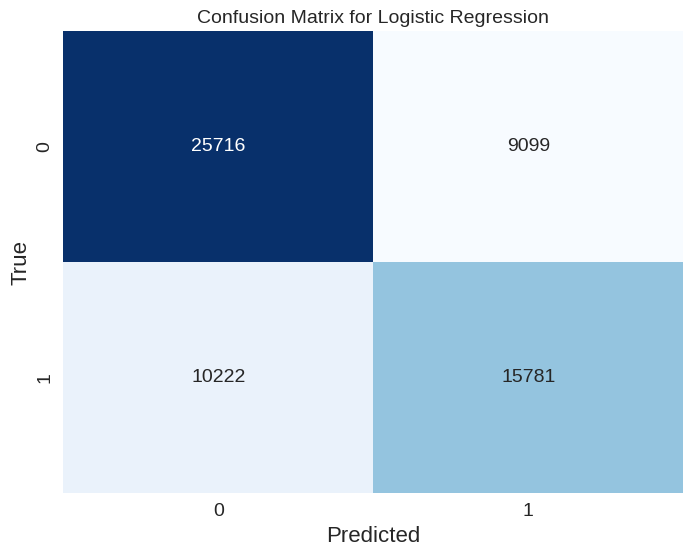

In [100]:
cm_log = confusion_matrix(y_test, y_pred_lr)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


tn_log, fp_log, fn_log, tp_log = confusion_matrix(y_test, y_pred_lr).ravel()

tpr_log = tp_log / (tp_log + fn_log)

# Calculate False Positive Rate (FPR)
fpr_log = fp_log / (fp_log + tn_log)

# Calculate Precision
precision_log = precision_score(y_test, y_pred_lr)

# Calculate Recall
recall_log = recall_score(y_test, y_pred_lr)

# Calculate F1-Score
f1_log = f1_score(y_test, y_pred_lr)

model_metrics.loc[len(model_metrics)] = ['Logistic',tpr_log,fpr_log,precision_log,recall_log,f1_log]

In [101]:

def compute_log_likelihood(y_true, y_pred_proba):
    """
    Compute log-likelihood given true labels and predicted probabilities.
    """
    # Clip predicted probabilities to avoid log(0)
    y_pred_proba = np.clip(y_pred_proba, 1e-15, 1 - 1e-15)

    # Compute log-likelihood
    log_likelihood = np.sum(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba))

    return log_likelihood

def compute_aic(y_true, y_pred_proba, num_params):
    """
    Compute AIC given true labels, predicted probabilities, and number of parameters.
    """
    # Compute log-likelihood
    log_likelihood = compute_log_likelihood(y_true, y_pred_proba)

    # Compute AIC
    aic = -2 * log_likelihood + 2 * num_params

    return aic


In [102]:
AIC_Score_df = pd.DataFrame(columns = ['Model', 'Score'])

# Logistic Regression
y_pred_proba = clf.predict_proba(x_test)[:, 1]
num_params = x_train.shape[1] + 1
aic = compute_aic(y_test, y_pred_proba, num_params)
AIC_Score_df.loc[len(AIC_Score_df)] = ['Logistic Regression',aic]

### **Random Forest**

In [103]:
# Second model is Random Forest
rfr = RandomForestClassifier(max_depth=15)

# Fit the model
rfr.fit(x_train, y_train)

# Predictions on the testing and training sets
y_pred_test_rfr = rfr.predict(x_test)
y_pred_train_rfr = rfr.predict(x_train)

accuracy_test_rfr = accuracy_score(y_test, y_pred_test_rfr)
accuracy_train_rfr = accuracy_score(y_train, y_pred_train_rfr)
print(accuracy_test_rfr , ' ',accuracy_train_rfr)

0.6760662961623204   0.7111530092681403


**Confusion Matrix**

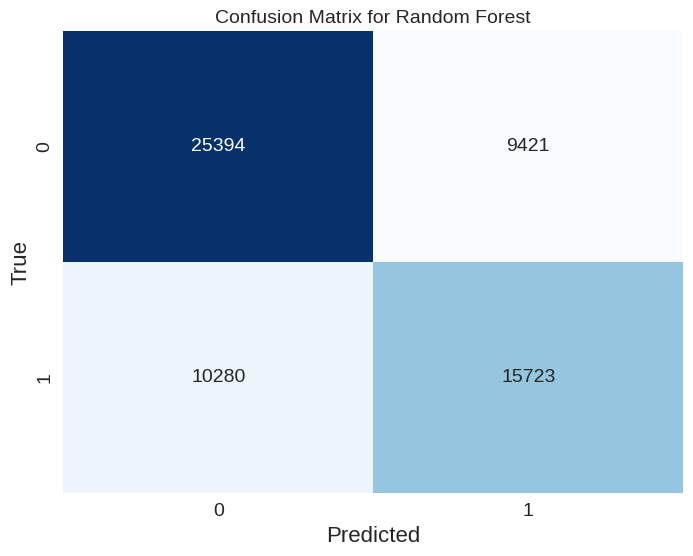

In [105]:
cm_rfc = confusion_matrix(y_test, y_pred_test_rfr)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()


tn_rfc, fp_rfc, fn_rfc, tp_rfc = confusion_matrix(y_test, y_pred_test_rfr).ravel()

tpr_rfc = tp_rfc / (tp_rfc + fn_rfc)

# Calculate False Positive Rate (FPR)
fpr_rfc = fp_rfc / (fp_rfc + tn_rfc)

# Calculate Precision
precision_rfc = precision_score(y_test, y_pred_test_rfr)

# Calculate Recall
recall_rfc = recall_score(y_test, y_pred_test_rfr)

# Calculate F1-Score
f1_rfc = f1_score(y_test, y_pred_test_rfr)

model_metrics.loc[len(model_metrics)] = ['Random Forest',tpr_rfc,fpr_rfc,precision_rfc,recall_rfc,f1_rfc]


In [106]:
# Random Forest
y_pred_proba = rfr.predict_proba(x_test)[:, 1]
num_params = x_train.shape[1] + 1
aic = compute_aic(y_test, y_pred_proba, num_params)
AIC_Score_df.loc[len(AIC_Score_df)] = ['Random Forest',aic]


### **XGBoost**

In [107]:
def sanitize_feature_names(df):
    sanitized_columns = [col.replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in df.columns]
    df.columns = sanitized_columns
    return df

# Sanitize feature names in x_train
x_train_sanitized = sanitize_feature_names(x_train)

# Sanitize feature names in x_test
x_test_sanitized = sanitize_feature_names(x_test)

In [112]:
# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Randomized cross-validation
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=10,
                                       scoring='accuracy', cv=5, verbose=1, random_state=42)

# Fit the model
xgb_random_search.fit(x_train_sanitized, y_train)

best_estimator_xgb = xgb_random_search.best_estimator_

# Predictions on the test set
y_pred_xgb = best_estimator_xgb.predict(x_test_sanitized)
y_pred_proba = best_estimator_xgb.predict_proba(x_test)[:, 1]
num_params = x_train.shape[1] + 1
aic = compute_aic(y_test, y_pred_proba, num_params)
AIC_Score_df.loc[len(AIC_Score_df)] = ['XGBoost',aic]

# Cross-validation scores for the best model
cv_scores_best_model = cross_val_score(best_estimator_xgb, x_train_sanitized, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores for the best XGB Classifier model:", cv_scores_best_model)
print("Mean Cross-validation accuracy for the best XGB Classifier model:", np.mean(cv_scores_best_model))

# AIC for XGBoost


# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Cross-validation scores for the best XGB Classifier model: [0.6875668  0.6896221  0.68751199 0.68761304 0.68374897]
Mean Cross-validation accuracy for the best XGB Classifier model: 0.6872125804281438
Accuracy: 0.681722516360288


**Confusion Matrix**

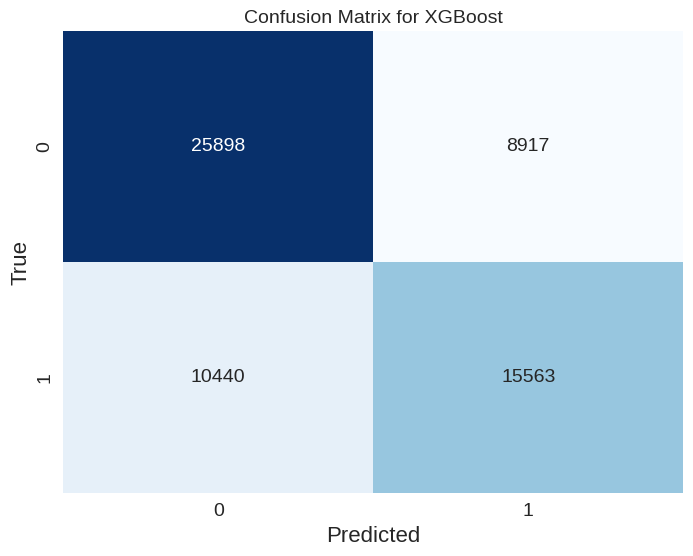

In [113]:
## XG Boost Classifier
# from sklearn.metrics import
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBoost')
plt.show()

tn_xgb, fp_xgb, fn_xgb, tp_xgb = confusion_matrix(y_test, y_pred_xgb).ravel()

tpr_xgb = tp_xgb / (tp_xgb + fn_xgb)

# Calculate False Positive Rate (FPR)
fpr_xgb = fp_xgb / (fp_xgb + tn_xgb)

# Calculate Precision
precision_xgb = precision_score(y_test, y_pred_xgb)

# Calculate Recall
recall_xgb = recall_score(y_test, y_pred_xgb)

# Calculate F1-Score
f1_xgb = f1_score(y_test, y_pred_xgb)

model_metrics.loc[len(model_metrics)] = ['XG Boost',tpr_xgb,fpr_xgb,precision_xgb,recall_xgb,f1_xgb]

### **Random Forest (Hyperparameter Tuning)**

In [114]:
# Define the parameter distributions
param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': [None, 5, 10],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf':randint(2,6)
}


# Perform RandomizedSearchCV
rf_random_search = RandomizedSearchCV(rfr, param_distributions=param_dist, n_iter=5,
                                    cv=3, scoring='accuracy', random_state=42)
rf_random_search.fit(x_train, y_train)

# Get the best estimator from the RandomizedSearchCV
best_estimator_rf = rf_random_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred_rsv = best_estimator_rf.predict(x_test)

# Perform cross-validation with the best Random Forest model
cv_scores_best_model = cross_val_score(best_estimator_rf, x_train, y_train, cv=3)
print("Cross-validation scores for the best Random Forest model:", cv_scores_best_model)
print("Mean Cross-validation accuracy for the best Random Forest model:", np.mean(cv_scores_best_model))

# Calculate accuracy
accuracy_rsv = accuracy_score(y_test, y_pred_rsv)

print("Accuracy on Test Set:", accuracy_rsv)


Cross-validation scores for the best Random Forest model: [0.68654017 0.68486303 0.68420014]
Mean Cross-validation accuracy for the best Random Forest model: 0.685201114802314
Accuracy on Test Set: 0.6812621263441744


**Confusion Matrix**

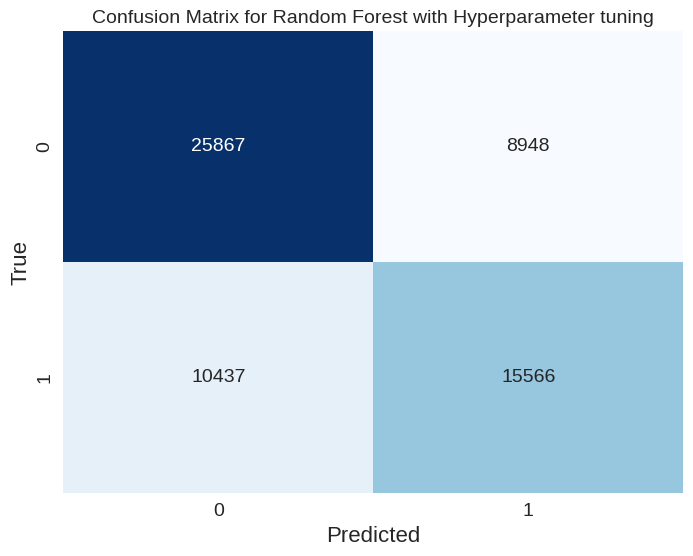

In [115]:
cm_rfc_cv = confusion_matrix(y_test, y_pred_rsv)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc_cv, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest with Hyperparameter tuning')
plt.show()


tn_rfc_cv, fp_rfc_cv, fn_rfc_cv, tp_rfc_cv = confusion_matrix(y_test, y_pred_rsv).ravel()

tpr_rfc_cv = tp_rfc_cv / (tp_rfc_cv + fn_rfc_cv)

# Calculate False Positive Rate (FPR)
fpr_rfc_cv = fp_rfc_cv / (fp_rfc_cv + tn_rfc_cv)

# Calculate Precision
precision_rfc_cv = precision_score(y_test, y_pred_rsv)

# Calculate Recall
recall_rfc_cv = recall_score(y_test, y_pred_rsv)

# Calculate F1-Score
f1_rfc_cv = f1_score(y_test, y_pred_rsv)

model_metrics.loc[len(model_metrics)] = ['Random Forest hyperparameter tuned',tpr_rfc_cv,fpr_rfc_cv,precision_rfc_cv,recall_rfc_cv,f1_rfc_cv]


In [117]:
# Random Forest with hyper parameter tuning
y_pred_proba = rf_random_search.predict_proba(x_test)[:, 1]
num_params = x_train.shape[1] + 1
aic = compute_aic(y_test, y_pred_proba, num_params)
AIC_Score_df.loc[len(AIC_Score_df)] = ['Random Forest with hyper parameter tuning',aic]

### **Decision Tree**

In [118]:
# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters grid to search
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model with the best parameters on the test set
best_estimator = grid_search.best_estimator_
y_pred_dt = best_estimator.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score: 0.6751656361822369
Accuracy: 0.673320398566214


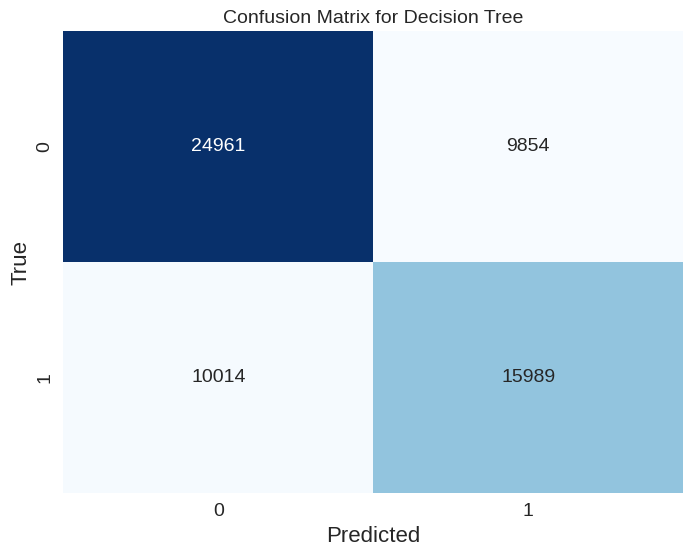

In [119]:
## Decision tree Classifier
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

tn_dt, fp_dt, fn_dt, tp_dt = confusion_matrix(y_test, y_pred_dt).ravel()

tpr_dt = tp_dt / (tp_dt + fn_dt)

# Calculate False Positive Rate (FPR)
fpr_dt = fp_dt / (fp_dt + tn_dt)

# Calculate Precision
precision_dt = precision_score(y_test, y_pred_dt)

# Calculate Recall
recall_dt = recall_score(y_test, y_pred_dt)

# Calculate F1-Score
f1_dt = f1_score(y_test, y_pred_dt)

model_metrics.loc[len(model_metrics)] = ['Decision Tree',tpr_dt,fpr_dt,precision_dt,recall_dt,f1_dt]


In [121]:
# Decision Tree
y_pred_proba = best_estimator.predict_proba(x_test)[:, 1]
num_params = x_train.shape[1] + 1
aic = compute_aic(y_test, y_pred_proba, num_params)
AIC_Score_df.loc[len(AIC_Score_df)] = ['Decision Tree',aic]

# **Model Evaluation**

In [122]:
model_metrics

,Model,TPR,FPR,Recall,Precision,F1-Score
0,Logistic,0.61,0.26,0.63,0.61,0.62
1,Random Forest,0.60,0.27,0.63,0.60,0.61
2,XG Boost,0.60,0.26,0.64,0.60,0.62
3,XG Boost,0.60,0.26,0.64,0.60,0.62
4,Random Forest hyperparameter tuned,0.60,0.26,0.63,0.60,0.62
5,Decision Tree,0.61,0.28,0.62,0.61,0.62


**Inference based on confusion metrics:**

**Logistic Regression:**
1. Moderate TPR and FPR
2. Balanced precision and recall
3. Overall F1-score is reasonable but could be improved
**Random Forest:**
1. Similar performance to logistic regression, with slightly lower TPR and slightly higher FPR
2. Balanced precision and recall
3. F1-score is comparable to logistic regression
**XGBoost:**
1. Similar performance to logistic regression and random forest, with slightly lower TPR and FPR
2. Balanced precision and recall
3. F1-score is equal to logistic regression and comparable to random forest
**Random Forest Hyperparameter Tuned:**
1. Similar performance to the regular random forest model
2. Slightly higher TPR and slightly lower FPR compared to other models
3. Balanced precision and recall
4. F1-score is comparable to other models
**Decision Tree**
1. Slightly higher FPR and similar TPR compared to other models
2. Balanced precision and recall
3. F1-score is comparable to other models

Overall, all models seem to have relatively similar performance based on the provided metrics.

**Analysing AIC for comparing model performance**

In [123]:
AIC_Score_df

,Model,Score
0,Logistic Regression,71433.00
1,Random Forest,73262.94
2,XGBoost,71347.01
3,Random Forest with hyper parameter tuning,71690.99
4,Decision Tree,75073.76


From the above table, AIC score is lowest for XGBoost

**Calculating AUC score for comparing model performance**

In [124]:
AUC_Score_df = pd.DataFrame(columns = ['Model', 'Score'])

# Logistic Regression
auc_score = roc_auc_score(y_test, y_pred_lr)
formatted_value = "{:.3f}".format(auc_score)
AUC_Score_df.loc[len(AUC_Score_df)] = ['Logistic Regression',formatted_value]

# Random Forest
auc_score = roc_auc_score(y_test, y_pred_test_rfr)
formatted_value = "{:.3f}".format(auc_score)
AUC_Score_df.loc[len(AUC_Score_df)] = ['Random Forest',formatted_value]

# XGB Boost
auc_score = roc_auc_score(y_test, y_pred_xgb)
formatted_value = "{:.3f}".format(auc_score)
AUC_Score_df.loc[len(AUC_Score_df)] = ['XGB Boost',formatted_value]

# Decision Tree
auc_score = roc_auc_score(y_test, y_pred_dt)
formatted_value = "{:.3f}".format(auc_score)
AUC_Score_df.loc[len(AUC_Score_df)] = ['Decision Tree',formatted_value]

# Random Forest with hyper parameter tuning
auc_score = roc_auc_score(y_test, y_pred_rsv)
formatted_value = "{:.3f}".format(auc_score)
AUC_Score_df.loc[len(AUC_Score_df)] = ['Random Forest with hyper parameter tuning',formatted_value]

AUC_Score_df

,Model,Score
0,Logistic Regression,0.673
1,Random Forest,0.667
2,XGB Boost,0.671
3,Decision Tree,0.666
4,Random Forest with hyper parameter tuning,0.671


From the above table, AUC score is highest for Logistic Regression

In [125]:

Kappa_Score_df = pd.DataFrame(columns = ['Model1', 'Model2','Score'])
#
for i, col in enumerate([y_pred_lr,y_pred_test_rfr,y_pred_xgb, y_pred_rsv, y_pred_dt]):
  for j, col1 in enumerate([y_pred_lr,y_pred_test_rfr,y_pred_xgb, y_pred_rsv, y_pred_dt]):
    kappa = cohen_kappa_score(col, col1)
    Kappa_Score_df.loc[len(Kappa_Score_df)] = [i, j,kappa]


Kappa_Score_df

,Model1,Model2,Score
0,0.00,0.00,1.00
1,0.00,1.00,0.86
2,0.00,2.00,0.96
3,0.00,3.00,0.92
4,0.00,4.00,0.82
5,1.00,0.00,0.86
6,1.00,1.00,1.00
7,1.00,2.00,0.87
8,1.00,3.00,0.87
9,1.00,4.00,0.79


To the overall consistency of the models, we determined cohen kappa values between the models. And we could see that the models Logistic Regression and Random Forest have the highest agreement with 96% similarity in predictions. Logistic regression - Random Forest hyperparameter tuned  and XGBoost - Random Forest also have pretty good agreement of 92% for both. Overall all our models have showcased a high consistence in making predictions with above 79% between every combination.

# **Learning Curve for Testing & Training Score**

**Logistic Regression**

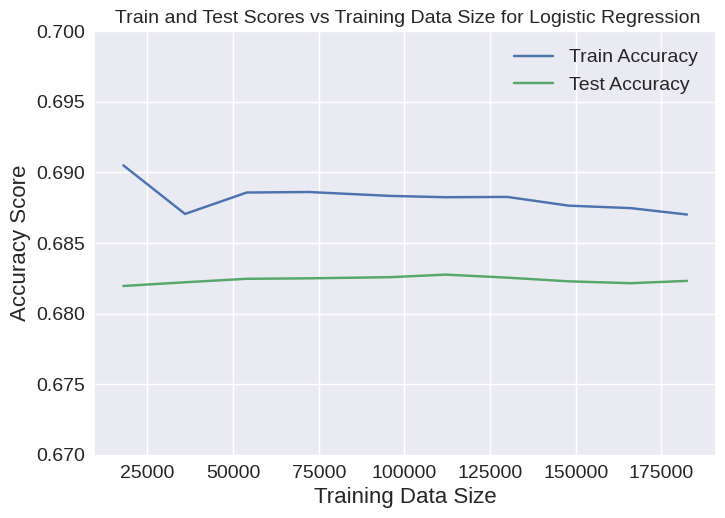

In [127]:

data_sizes = [18000,36000,54000,72000,96000, 112000, 130000,148000,166000,182453]

train_score = []
test_score = []

for size in data_sizes:


    clf.fit(x_train[:size],y_train[:size])

    y_train_predicted = clf.predict(x_train[:size])
    y_test_predicted = clf.predict(x_test)

    train_accuracy = accuracy_score(y_train[:size],y_train_predicted)
    test_accuracy = accuracy_score(y_test,y_test_predicted)

    train_score.append(train_accuracy)
    test_score.append(test_accuracy)


plt.plot( data_sizes,train_score, label="Train Accuracy")
plt.plot( data_sizes,test_score,label= "Test Accuracy")
plt.xlabel("Training Data Size")
plt.ylabel("Accuracy Score")
plt.title(" Train and Test Scores vs Training Data Size for Logistic Regression")
plt.ylim(0.67,0.7)
plt.legend()

**Random Forest**

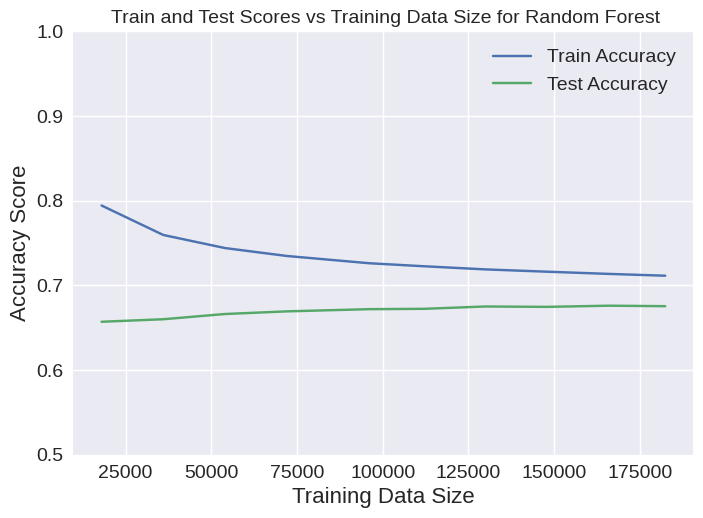

In [128]:

data_sizes = [18000,36000,54000,72000,96000, 112000, 130000,148000,166000,182453]

train_score = []
test_score = []

for size in data_sizes:


    rfr.fit(x_train[:size],y_train[:size])

    y_train_predicted = rfr.predict(x_train[:size])
    y_test_predicted = rfr.predict(x_test)

    train_accuracy = accuracy_score(y_train[:size],y_train_predicted)
    test_accuracy = accuracy_score(y_test,y_test_predicted)

    train_score.append(train_accuracy)
    test_score.append(test_accuracy)


plt.plot( data_sizes,train_score, label="Train Accuracy")
plt.plot( data_sizes,test_score,label= "Test Accuracy")
plt.xlabel("Training Data Size")
plt.ylabel("Accuracy Score")
plt.title(" Train and Test Scores vs Training Data Size for Random Forest")
plt.ylim(0.5,1)
plt.legend()

**XGBoost**

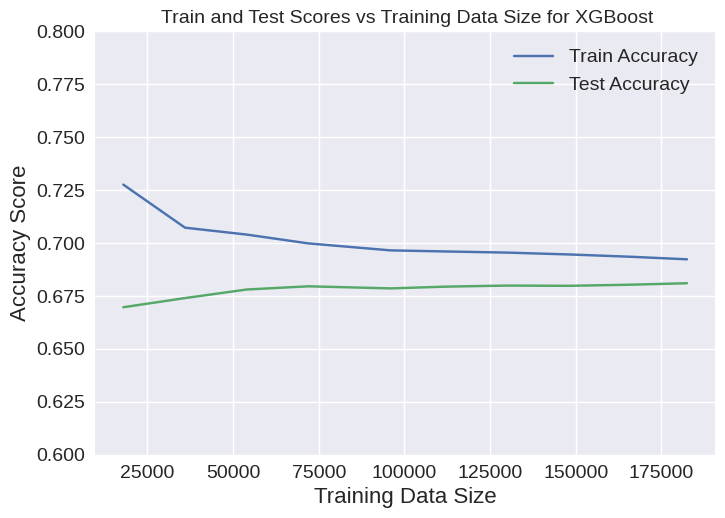

In [129]:

data_sizes = [18000,36000,54000,72000,96000, 112000, 130000,148000,166000,182453]

train_score = []
test_score = []

for size in data_sizes:


    xgb_model.fit(x_train[:size],y_train[:size])

    y_train_predicted = xgb_model.predict(x_train[:size])
    y_test_predicted = xgb_model.predict(x_test)

    train_accuracy = accuracy_score(y_train[:size],y_train_predicted)
    test_accuracy = accuracy_score(y_test,y_test_predicted)

    train_score.append(train_accuracy)
    test_score.append(test_accuracy)


plt.plot( data_sizes,train_score, label="Train Accuracy")
plt.plot( data_sizes,test_score,label= "Test Accuracy")
plt.xlabel("Training Data Size")
plt.ylabel("Accuracy Score")
plt.title(" Train and Test Scores vs Training Data Size for XGBoost")
plt.ylim(0.6,0.8)
plt.legend()

**Decision Tree**

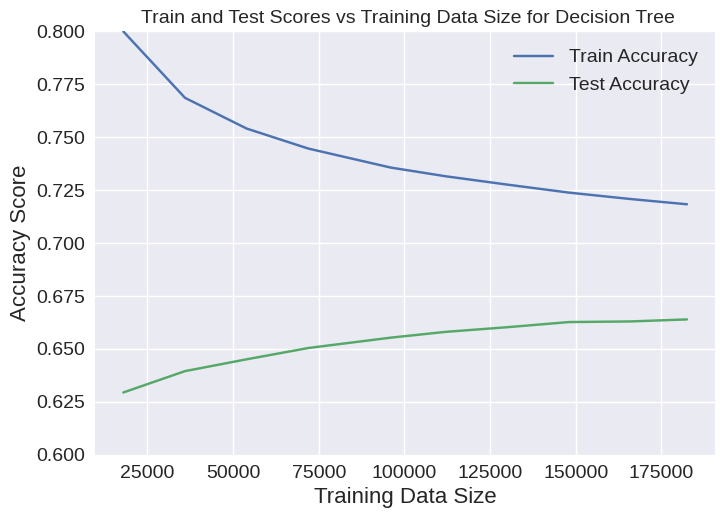

In [130]:
data_sizes = [18000,36000,54000,72000,96000, 112000, 130000,148000,166000,182453]

train_score = []
test_score = []

for size in data_sizes:


    decision_tree.fit(x_train[:size],y_train[:size])

    y_train_predicted = decision_tree.predict(x_train[:size])
    y_test_predicted = decision_tree.predict(x_test)

    train_accuracy = accuracy_score(y_train[:size],y_train_predicted)
    test_accuracy = accuracy_score(y_test,y_test_predicted)

    train_score.append(train_accuracy)
    test_score.append(test_accuracy)


plt.plot( data_sizes,train_score, label="Train Accuracy")
plt.plot( data_sizes,test_score,label= "Test Accuracy")
plt.xlabel("Training Data Size")
plt.ylabel("Accuracy Score")
plt.title(" Train and Test Scores vs Training Data Size for Decision Tree")
plt.ylim(0.6,0.8)
plt.legend()

**Inference from Training and Testing accuracy**

The training and testing accuracy scores differ marginally for all the models specially Logistic regression , XGBoost and Hyper parameter tuned Random Forest. The testing accuracy is consistently around **67%-69%** for all the models. Also, the difference between the training and testing accuracy is also very low, merely **1% to 2%**. Hence we can say that the model is performing consistently well on both training and test data. We dont see overfitting in the plot for any of the models.  We are seeing the **best training and testing accuracy curves for logistic regression** where the curves are almost overlapping with each other.

### CONCLUSION:

From all the model evaluation metrics that we used on our models, we are consistently seeing that Logistic Regression model gives second least AIC value, Highest AUC area, best training test accuracy curve. Confusion matrix also proved that Logistic Regression gives highest True positive values. From Kappa statistics we can concluded that all our models peformed uniformly on the training and test data giving 68% test accuracy consistently despite their underlying principle (Tree-based, Ensemble, or Linear model)

Taking model fitting time in consideration, Logistic Regression outperformed all other models.

# **PREDICTION RESULTS**

**Logistic prediction results**

In [131]:
y_pred_lr_df = pd.DataFrame(y_pred_lr,columns=['pred_results'])
x_test_reset = x_test.reset_index(drop=True)
y_pred_lr_df_reset = y_pred_lr_df.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)
logistic_results = pd.concat([x_test_reset,y_pred_lr_df_reset,y_test_reset],axis=1)
logistic_results.shape


(60818, 22)

In [133]:
# Export the cleaned data to a CSV file
csv_file_path = 'Logistic Regression Model Results.csv'
logistic_results.to_csv(csv_file_path, index=False)

print("Data has been exported to", csv_file_path)

Data has been exported to Logistic Regression Model Results.csv


**Random Forest prediction results**

In [134]:
y_pred_rfr_df = pd.DataFrame(y_pred_test_rfr,columns=['pred_results'])
# x_test_reset = x_test.reset_index(drop=True)
y_pred_rfr_df_reset = y_pred_rfr_df.reset_index(drop=True)
rfc_results = pd.concat([x_test_reset,y_pred_rfr_df_reset],axis=1)
rfc_results.shape

(60818, 21)

**Random Forest Hyperparameter tuned**

In [135]:
y_pred_rsv_df = pd.DataFrame(y_pred_rsv,columns=['pred_results'])
# x_test_reset = x_test.reset_index(drop=True)
y_pred_rsv_df_reset = y_pred_rsv_df.reset_index(drop=True)
rfctuned_results = pd.concat([x_test_reset,y_pred_rsv_df_reset],axis=1)
rfctuned_results.shape

(60818, 21)

**XGB results**

In [136]:
y_pred_xgb_df = pd.DataFrame(y_pred_xgb,columns=['pred_results'])
# x_test_reset = x_test.reset_index(drop=True)
y_pred_xgb_df_reset = y_pred_xgb_df.reset_index(drop=True)
xgb_results = pd.concat([x_test_reset,y_pred_xgb_df_reset],axis=1)
xgb_results.shape

(60818, 21)

**Decision Tree results**

In [137]:
y_pred_dt_df = pd.DataFrame(y_pred_dt,columns=['pred_results'])
# x_test_reset = x_test.reset_index(drop=True)
y_pred_dt_df_reset = y_pred_dt_df.reset_index(drop=True)
dt_results = pd.concat([x_test_reset,y_pred_dt_df_reset],axis=1)
dt_results.shape

(60818, 21)

**LOGISTIC REGRESSION PREDICTION RESULT**

The purpose of the analysis was to create a predictive model for mortality in older people with Type 2 Diabetes Mellitus (T2DM) to identify important clinical biomarkers and high risk individuals. We reduced the dataset to important variables that offer important insights on mortality by feature selection. Interestingly, peripheral vascular diseases, congestive heart failure, cardiac arrhythmias, age, and serum creatinine levels were found to be significant predictors of death.

The prediction results indicated that the 80–84 age group was particularly vulnerable, indicating a higher likelihood of death in this group. Individuals who were diagnosed with peripheral vascular diseases, cardiac arrhythmias, or congestive heart failure were also shown to have a significantly increased risk of death. This emphasizes how important heart-related illnesses are to the mortality associated with T2DM.

Furthermore, the relevance of serum creatinine levels in determining the mortality risk among patients with type 2 diabetes is highlighted by their inclusion as a significant clinical biomarker. All things considered, these results highlight the significance of thorough cardiac evaluation and vigilant serum creatinine level monitoring in lowering the risk of death in older type 2 diabetes patients.
